In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [3]:
from imblearn.over_sampling import RandomOverSampler
from scipy.stats import zscore

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score,GridSearchCV, train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

In [4]:
df=pd.read_csv("https://lms.intrnforte.com/wp-content/uploads/2022/10/Micro-credit-Data-file.csv")
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [6]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,209593.0,104797.000000,60504.431823,1.000000,52399.000,104797.000000,157195.00,209593.000000
label,209593.0,0.875177,0.330519,0.000000,1.000,1.000000,1.00,1.000000
aon,209593.0,8112.343445,75696.082531,-48.000000,246.000,527.000000,982.00,999860.755168
daily_decr30,209593.0,5381.402289,9220.623400,-93.012667,42.440,1469.175667,7244.00,265926.000000
daily_decr90,209593.0,6082.515068,10918.812767,-93.012667,42.692,1500.000000,7802.79,320630.000000
rental30,209593.0,2692.581910,4308.586781,-23737.140000,280.420,1083.570000,3356.94,198926.110000
rental90,209593.0,3483.406534,5770.461279,-24720.580000,300.260,1334.000000,4201.79,200148.110000
last_rech_date_ma,209593.0,3755.847800,53905.892230,-29.000000,1.000,3.000000,7.00,998650.377733
last_rech_date_da,209593.0,3712.202921,53374.833430,-29.000000,0.000,0.000000,0.00,999171.809410
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.000000,770.000,1539.000000,2309.00,55000.000000


In [8]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [9]:
#let us have brief understanding of unique values present in the dataset.
for i in df.columns:
    print('Name of attribute:',i,'\n',df[i].value_counts())
    print('*'*80)

Name of attribute: Unnamed: 0 
 Unnamed: 0
1         1
139733    1
139723    1
139724    1
139725    1
         ..
69869     1
69870     1
69871     1
69872     1
209593    1
Name: count, Length: 209593, dtype: int64
********************************************************************************
Name of attribute: label 
 label
1    183431
0     26162
Name: count, dtype: int64
********************************************************************************
Name of attribute: msisdn 
 msisdn
04581I85330    7
47819I90840    7
30080I90588    6
55809I89238    6
22038I88658    6
              ..
36902I90840    1
17447I88689    1
59686I90584    1
00504I91190    1
65061I85339    1
Name: count, Length: 186243, dtype: int64
********************************************************************************
Name of attribute: aon 
 aon
95.000000        392
92.000000        362
96.000000        357
99.000000        356
157.000000       349
                ... 
977092.351997      1
645851.038396    

In [10]:
df.drop(columns=['Unnamed: 0','pcircle','pdate','msisdn'], inplace=True, axis=1)

In [11]:
df['label'].value_counts()

label
1    183431
0     26162
Name: count, dtype: int64

% of non defaulters anddefaulters: 
 [0.875177129007171, 0.12482287099282896]


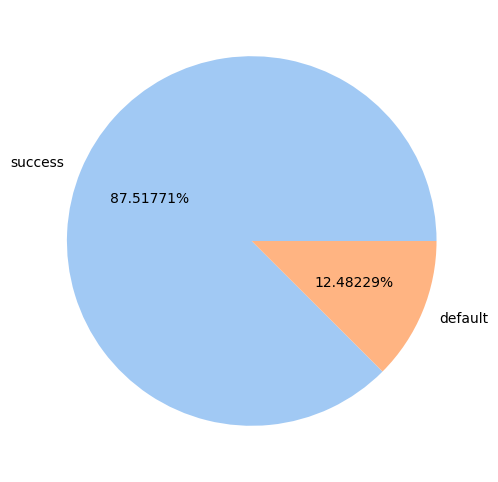

In [12]:
labels = ['success','default']
success = (df[df['label']==1].shape[0])/df.shape[0]
default = (df[df['label']==0].shape[0])/df.shape[0]
data= [success, default]
print("% of non defaulters anddefaulters: \n",data)
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(8,6), facecolor='white')
plt.pie(data, labels = labels, colors = colors, autopct='%2.5f%%')
plt.show()

In [13]:
def graph(data,col):
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    sns.distplot(data[col],color='blue')
    plt.subplot(1,2,2)
    sns.boxplot(data[col],color='red')
    plt.show()
    

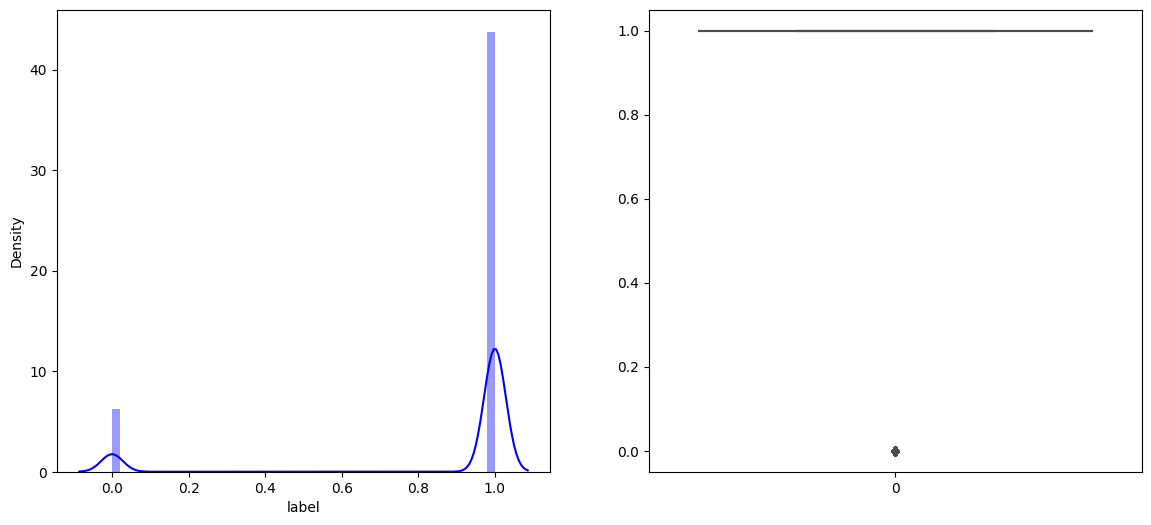

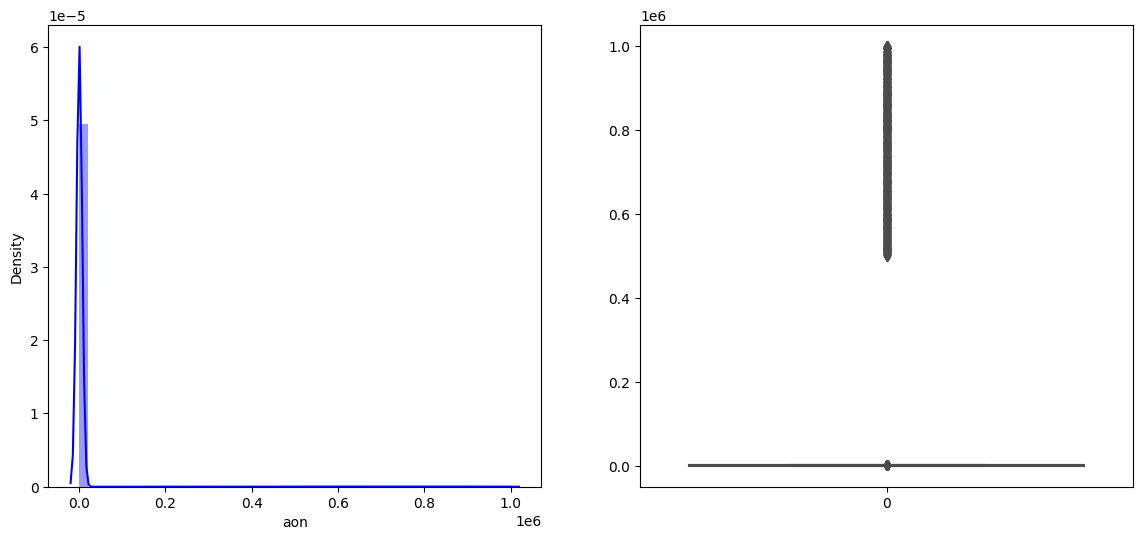

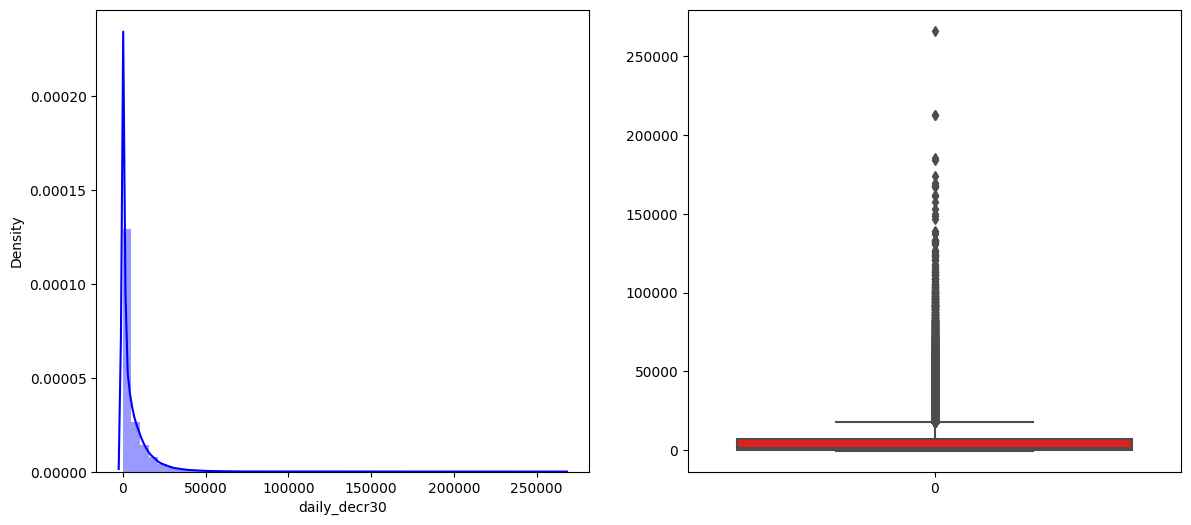

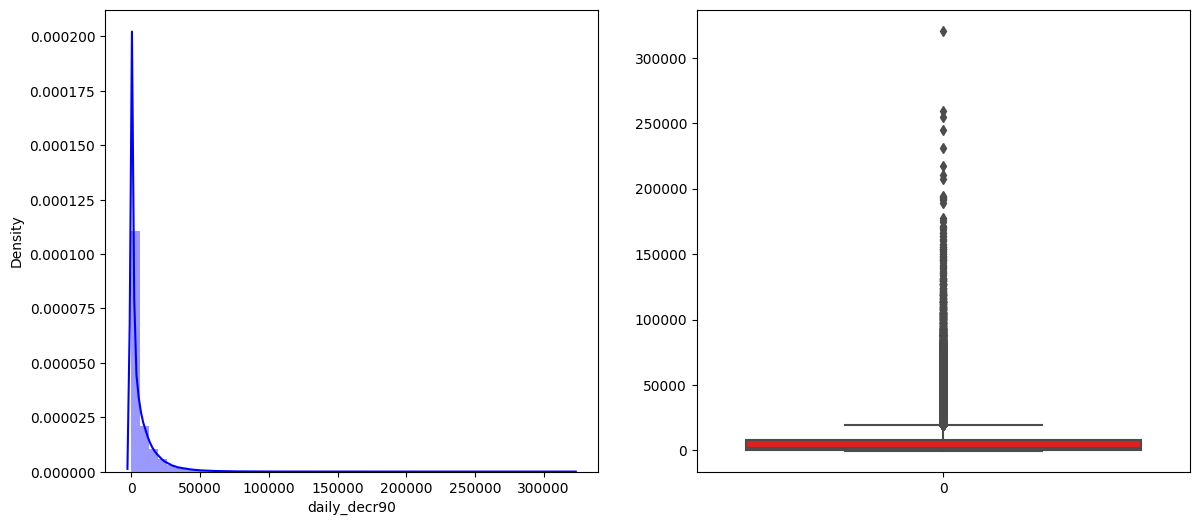

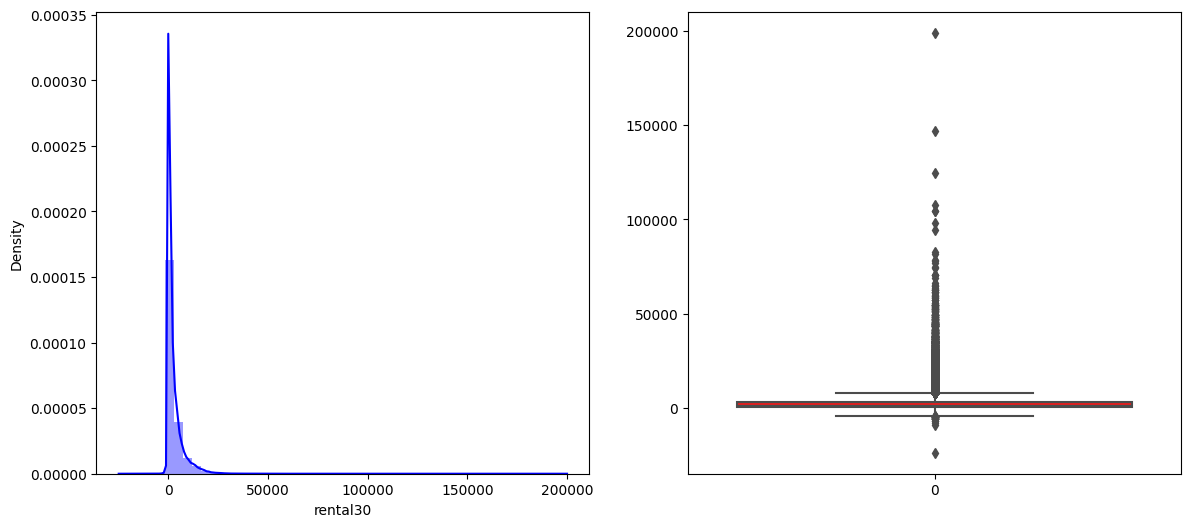

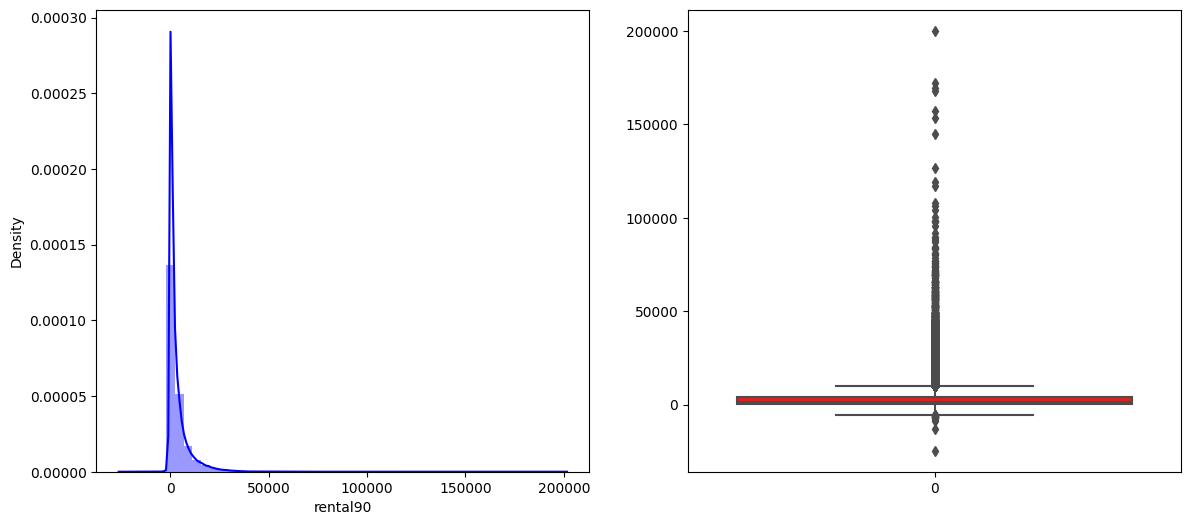

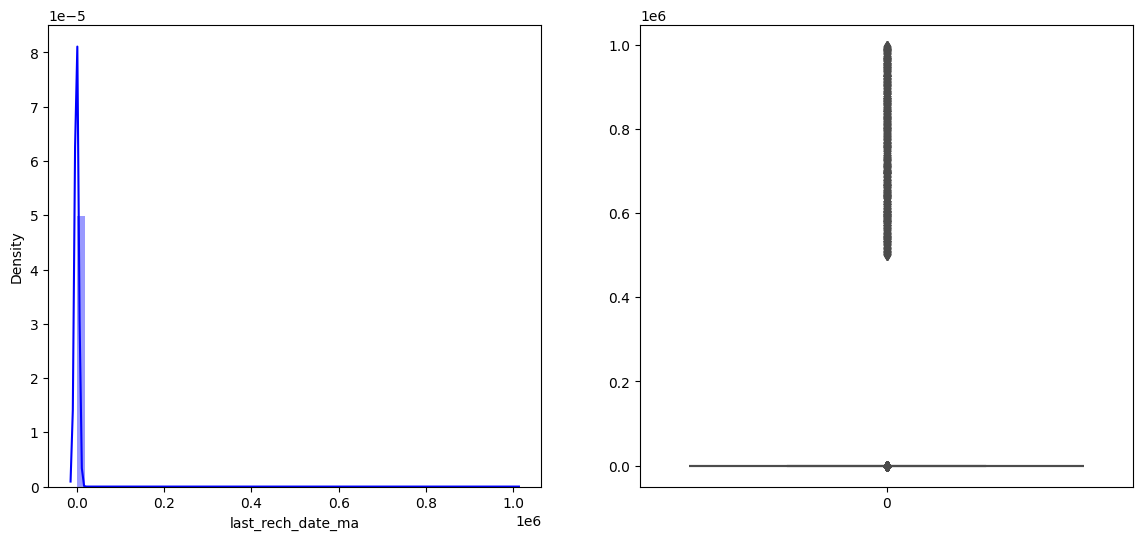

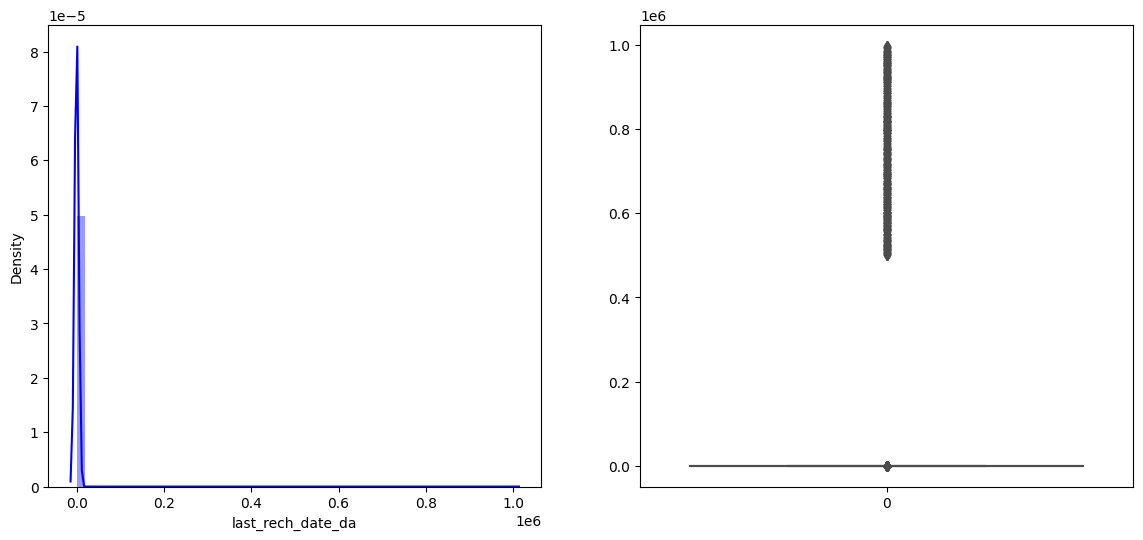

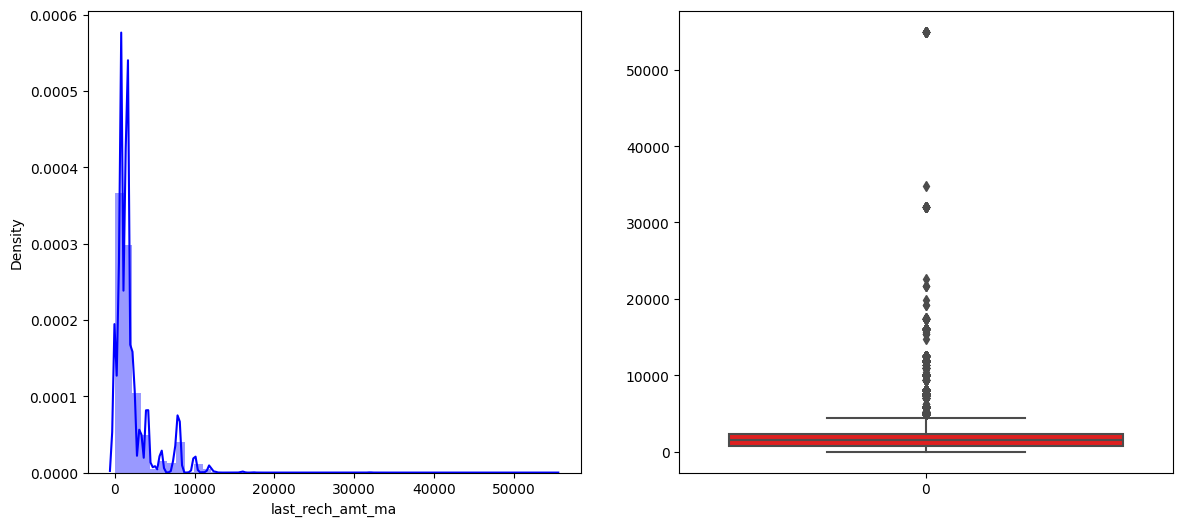

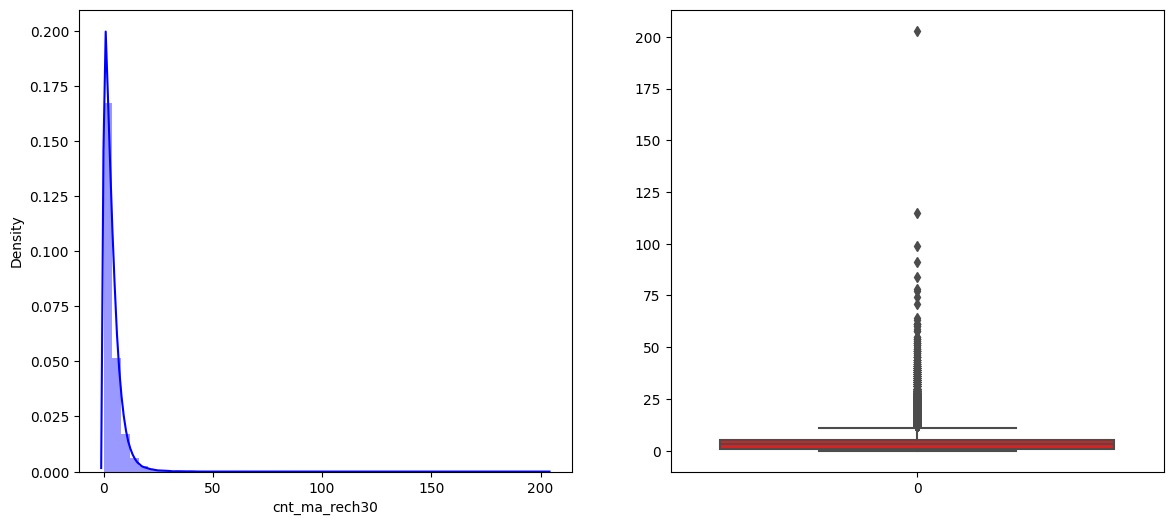

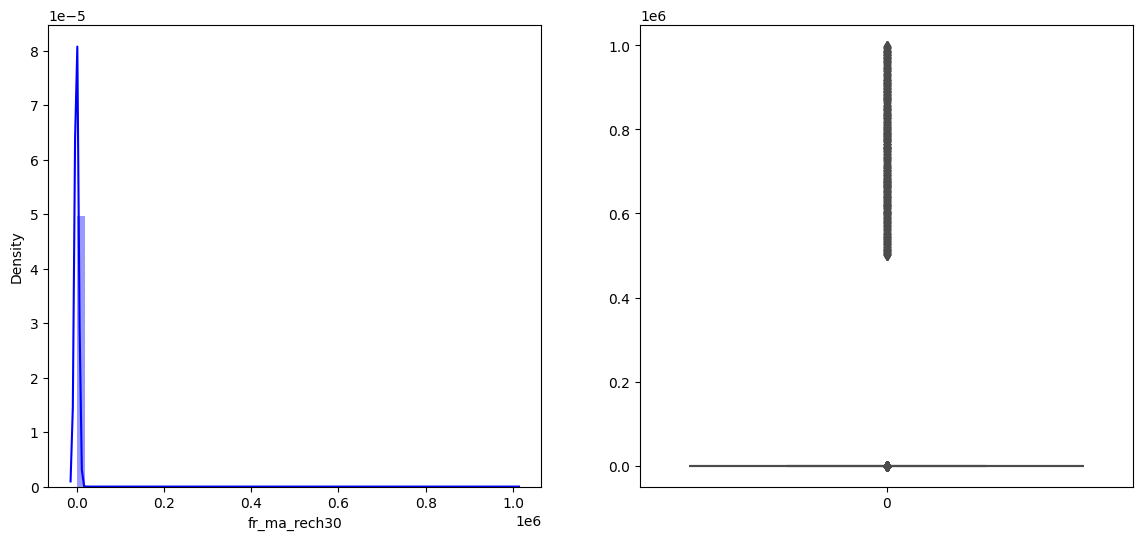

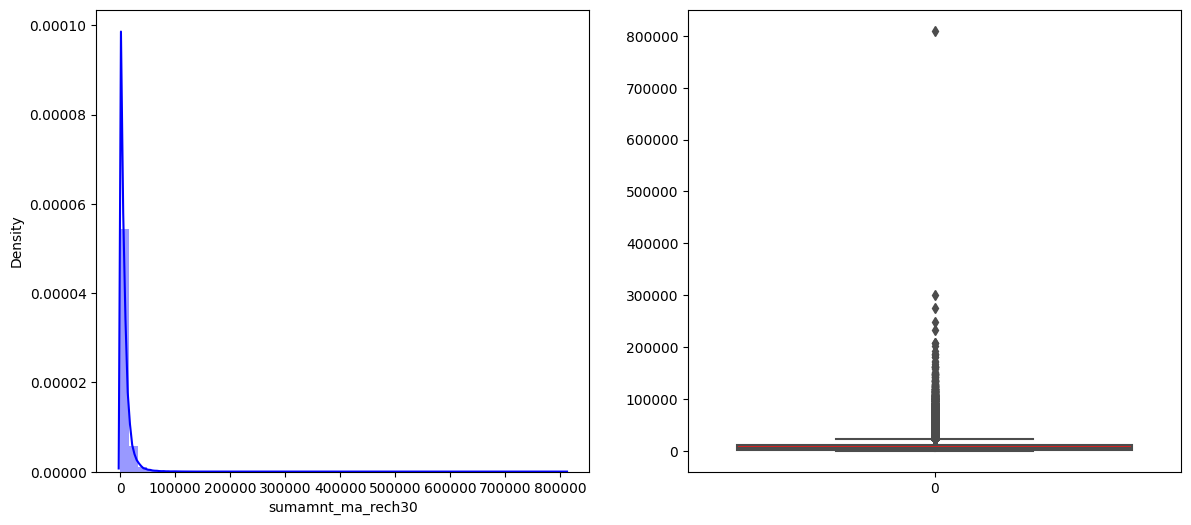

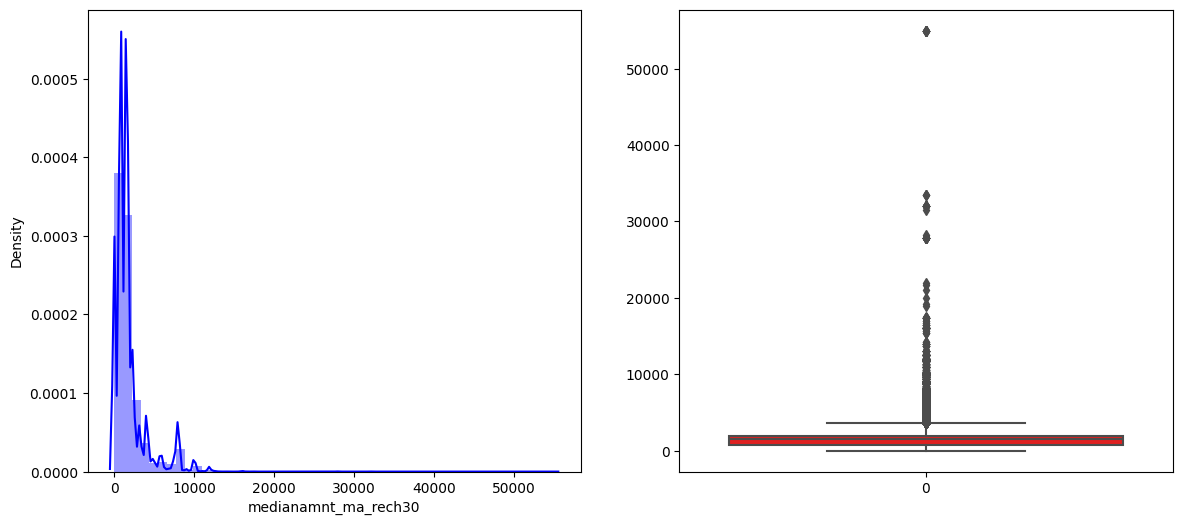

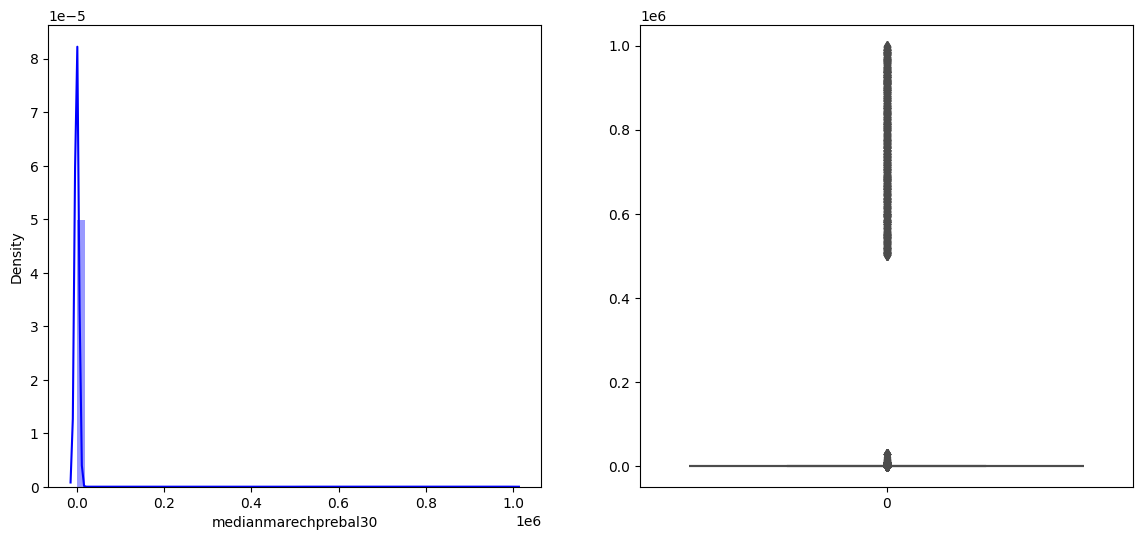

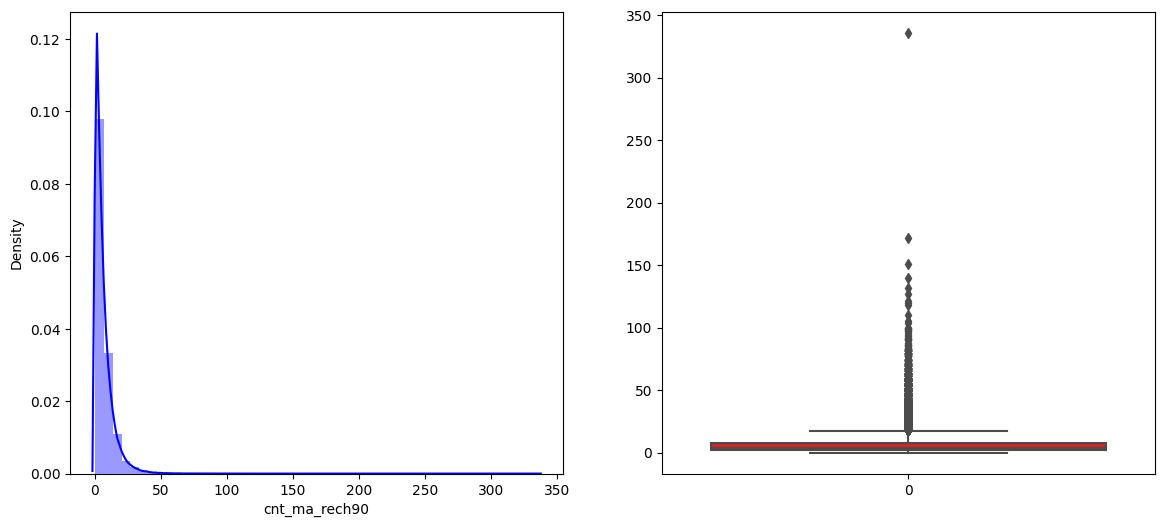

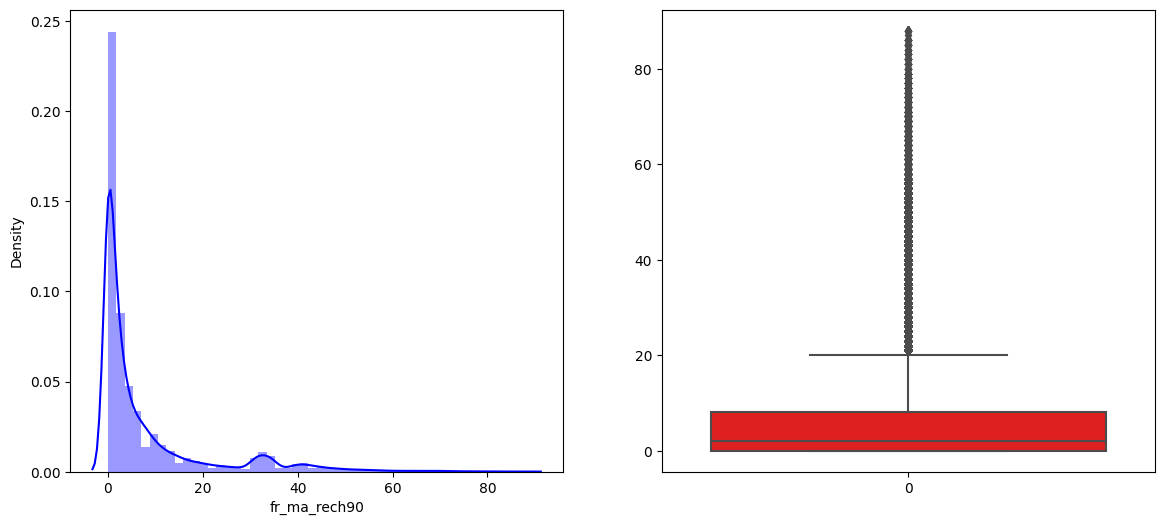

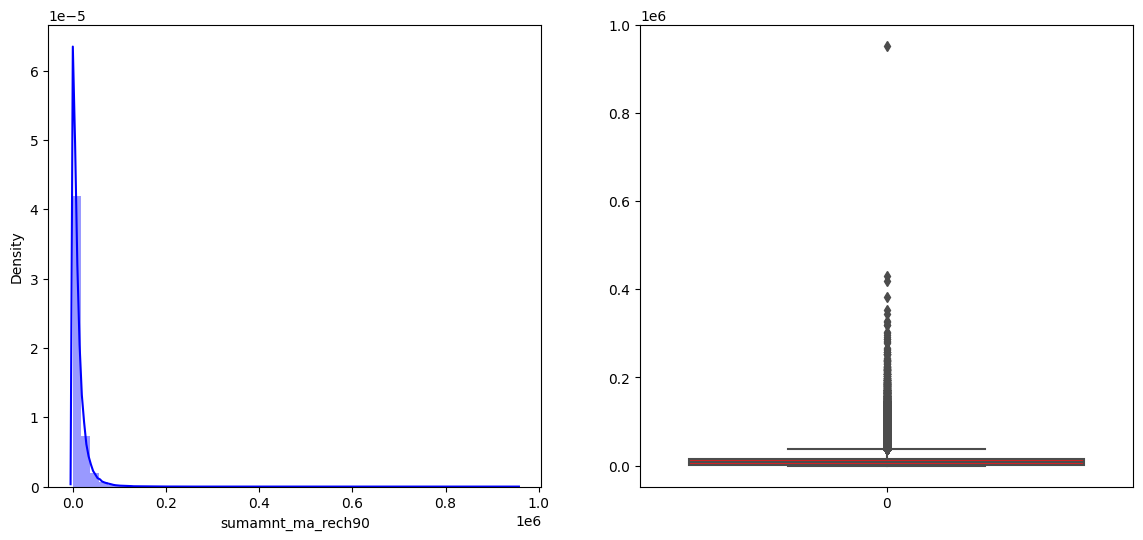

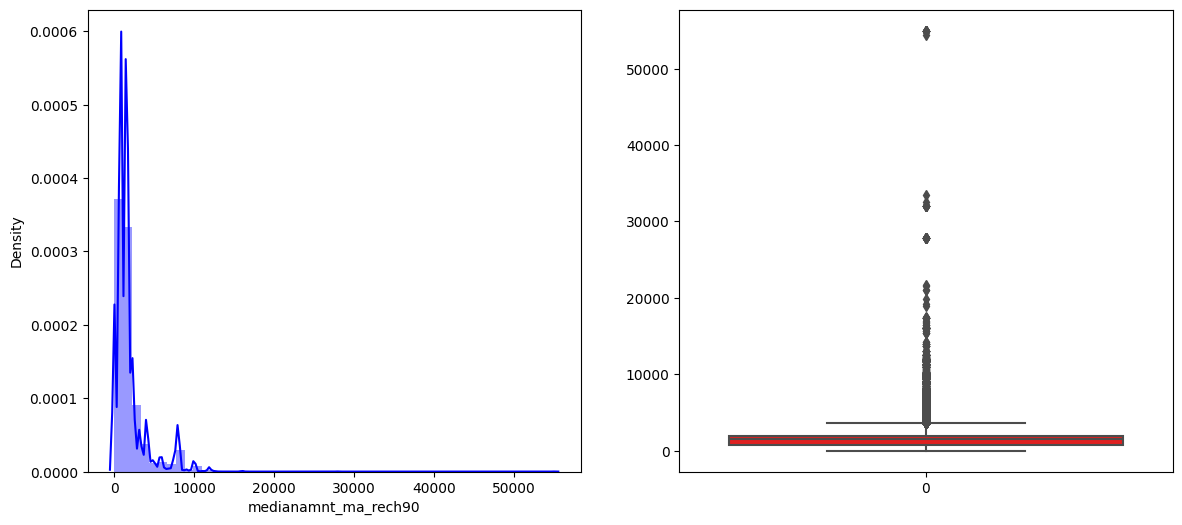

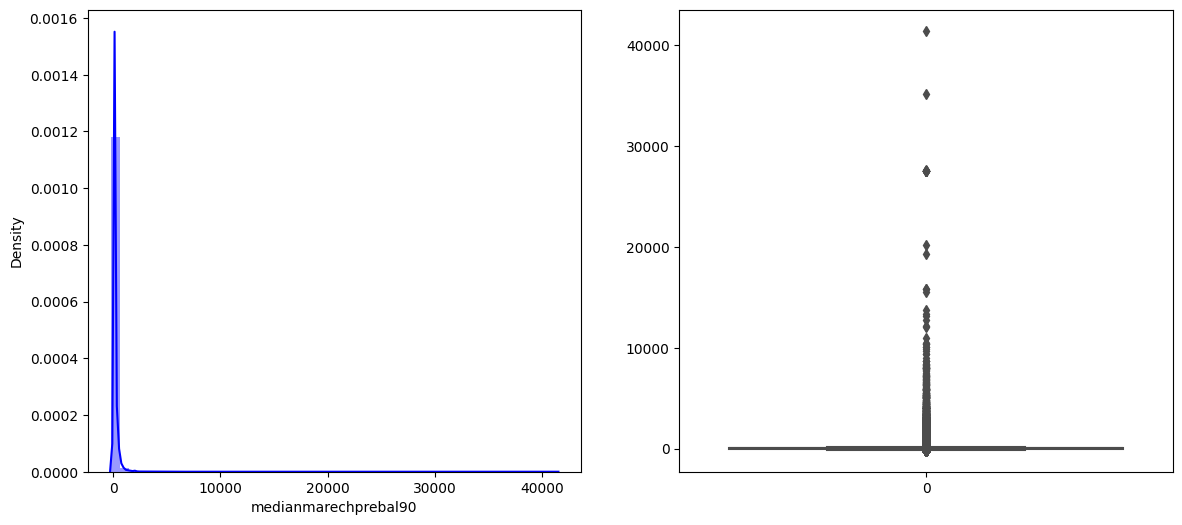

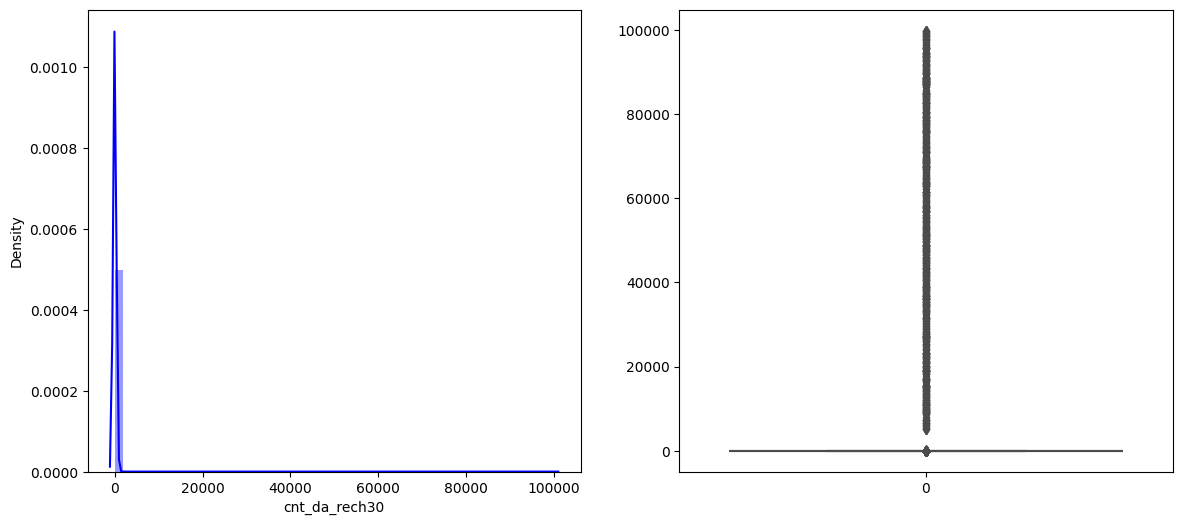

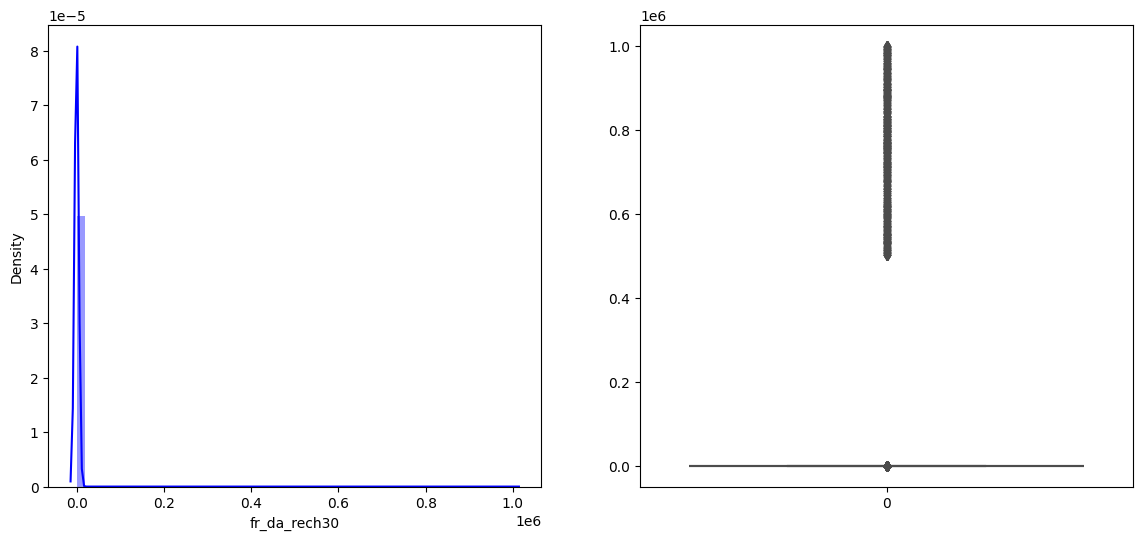

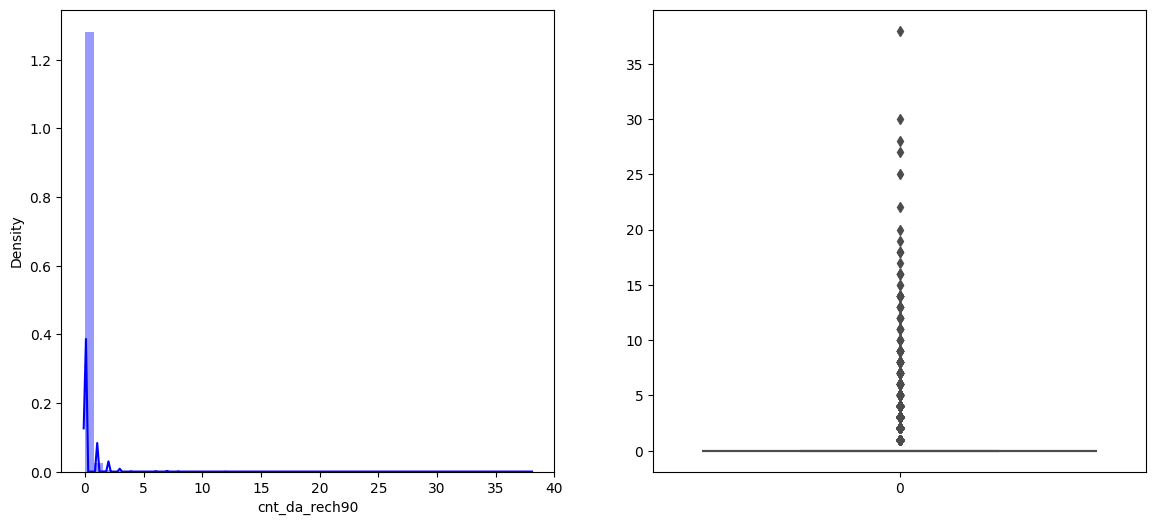

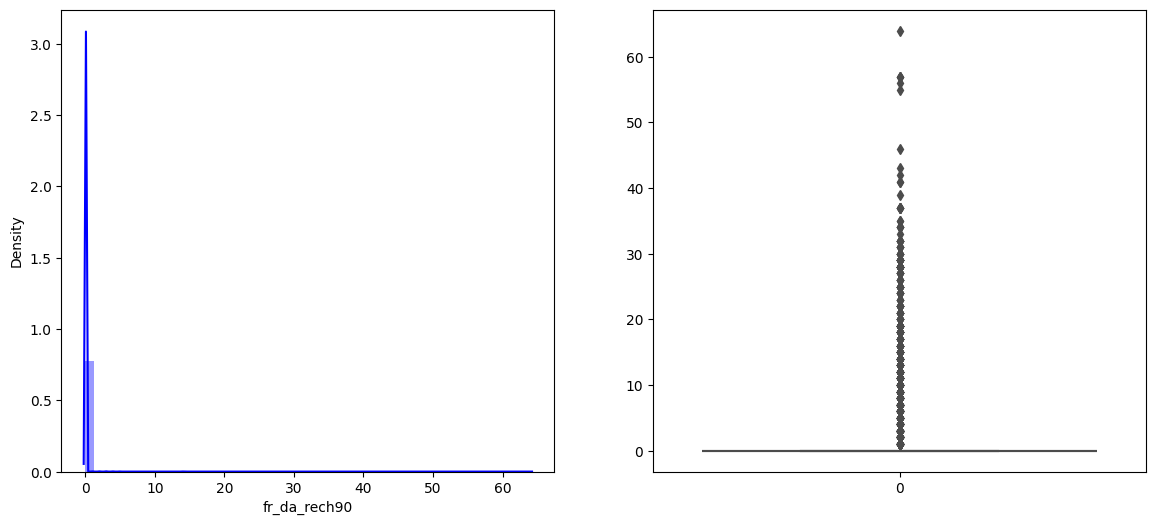

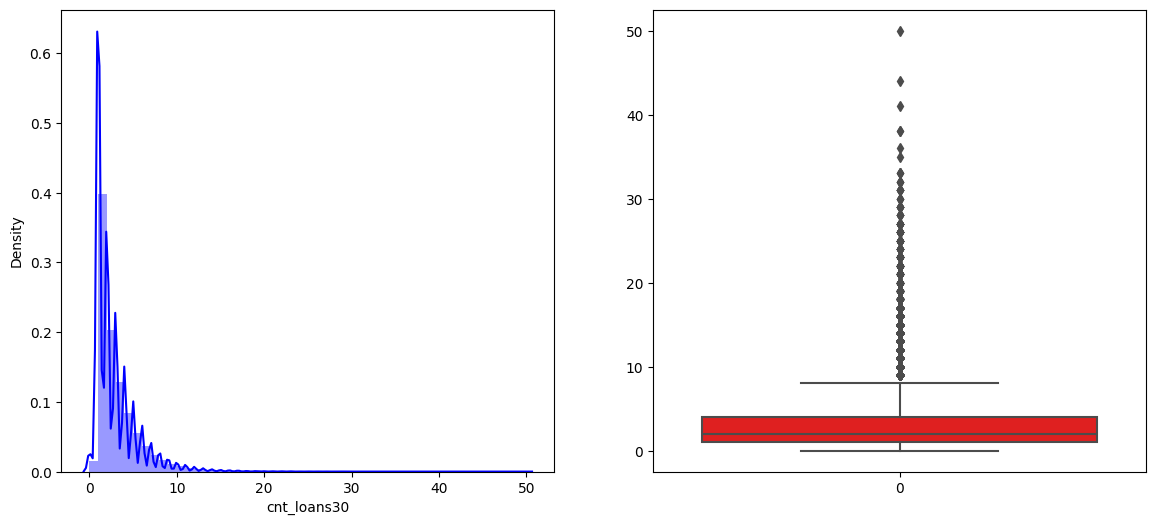

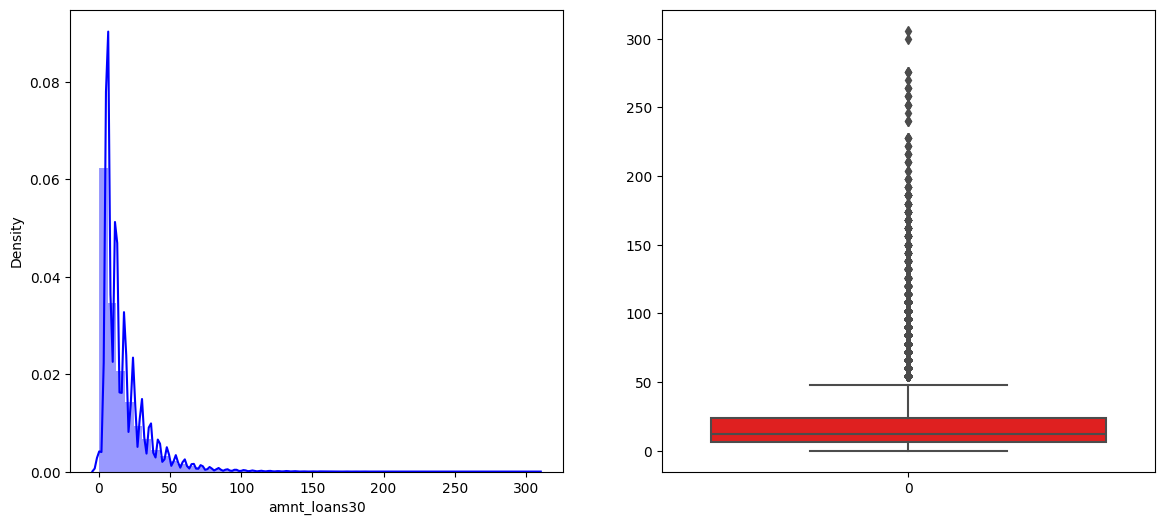

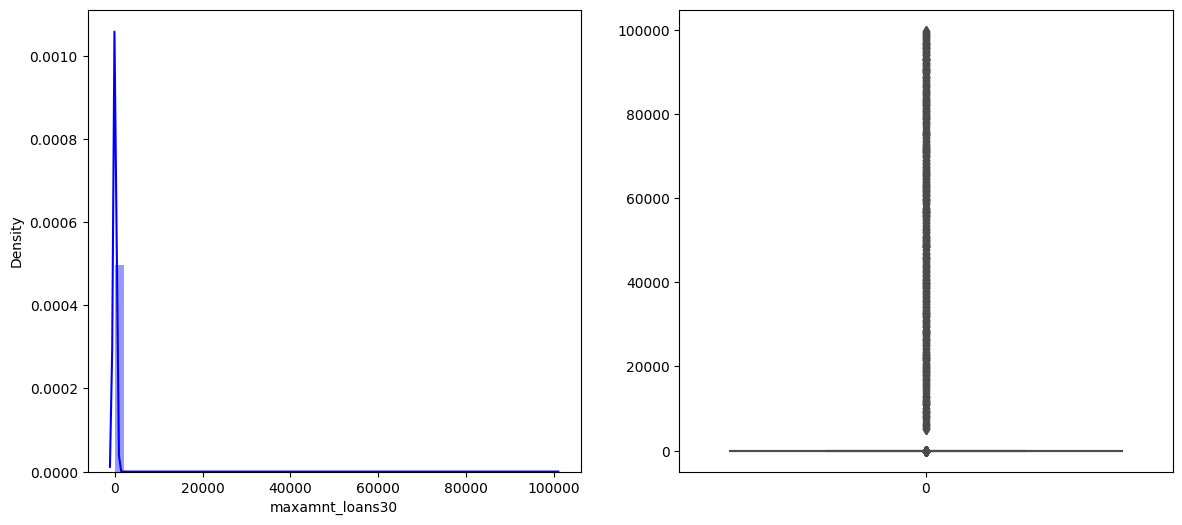

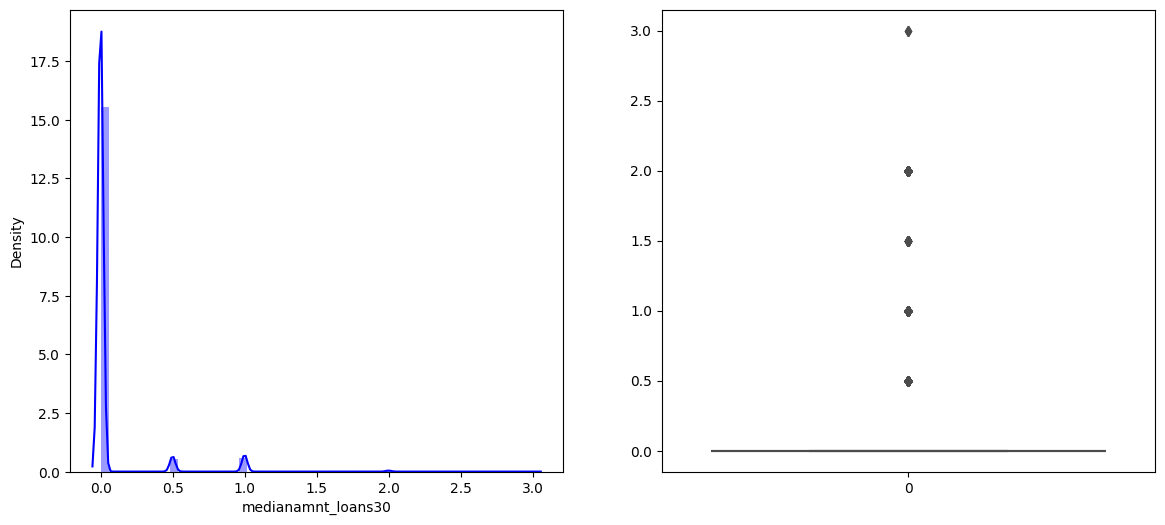

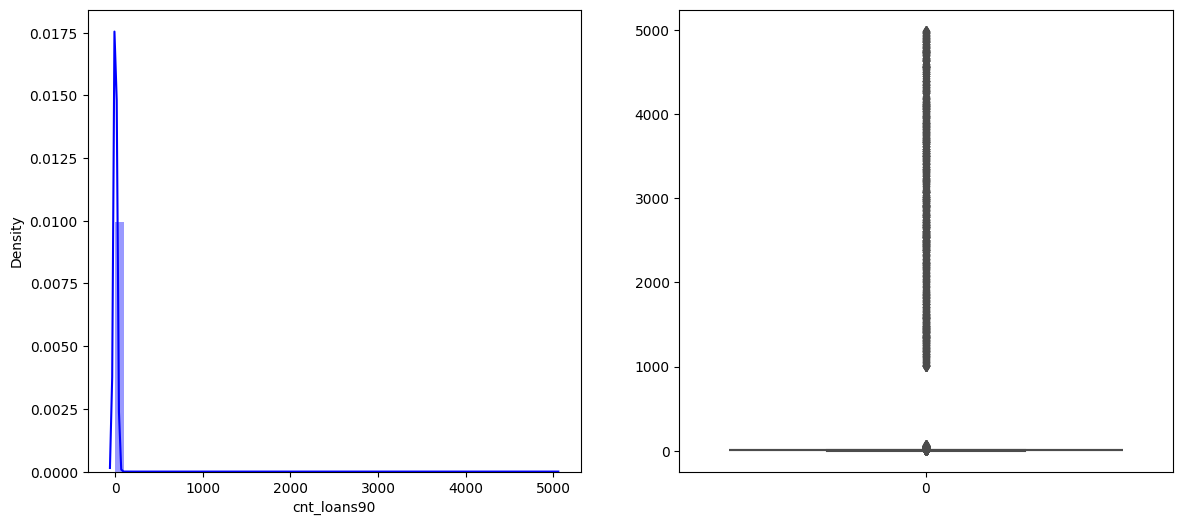

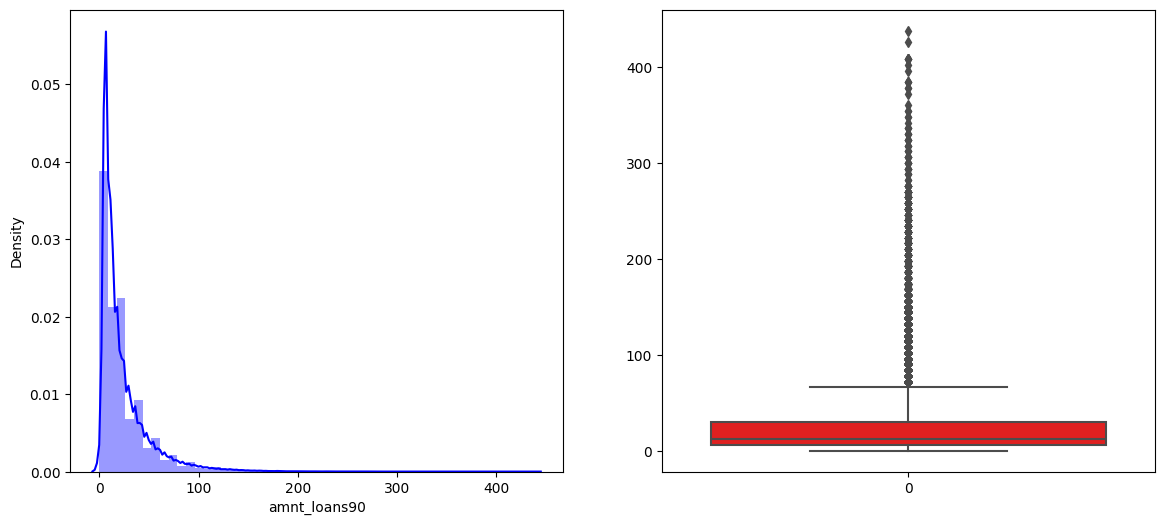

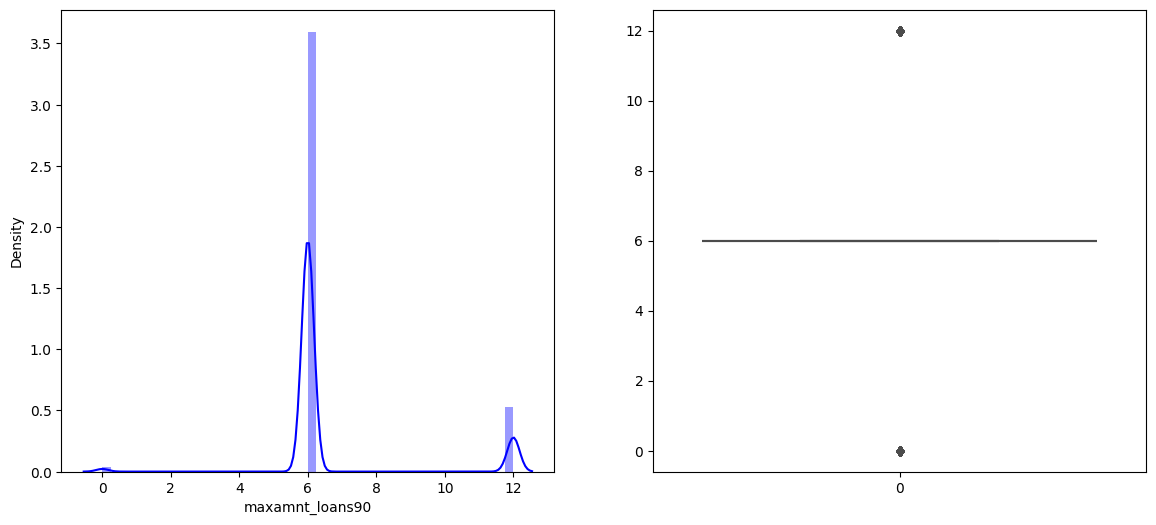

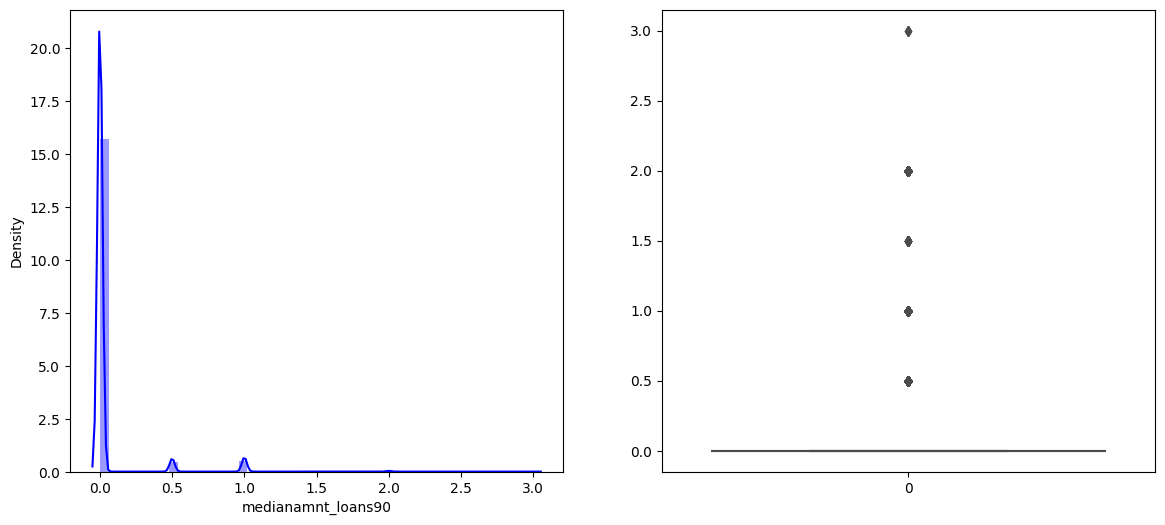

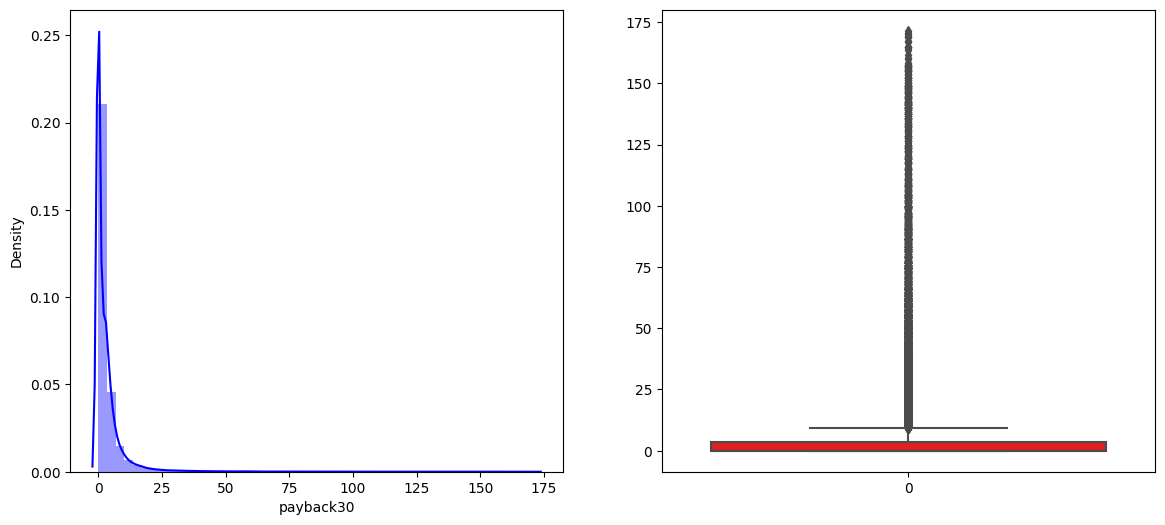

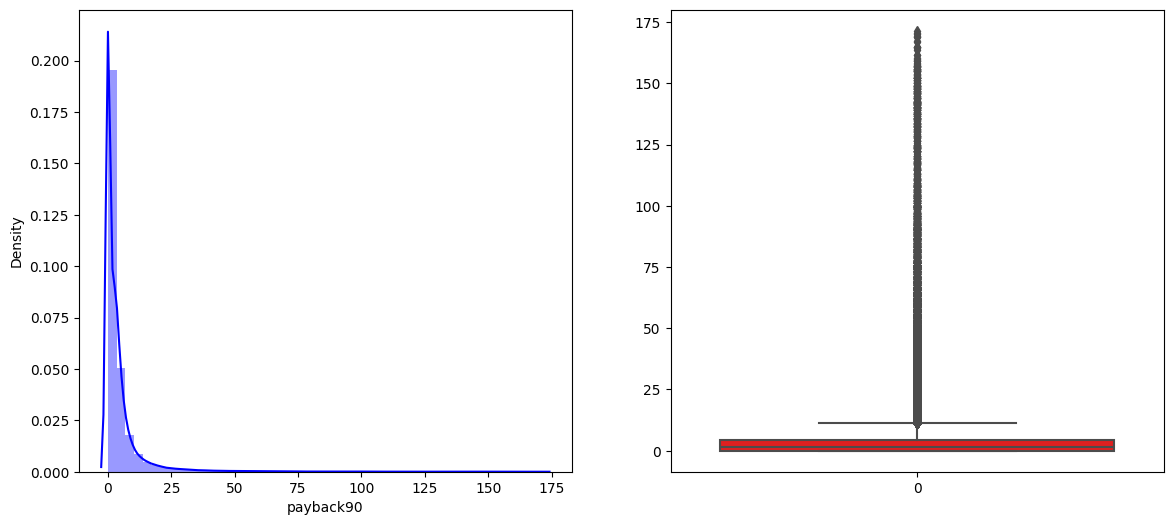

In [14]:
for i in df.columns:
    graph(df,i)


In [15]:
columns = [ 'aon', 'daily_decr30', 'daily_decr90','rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da','last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30','sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30','cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90','medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30','fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30','amnt_loans30', 'cnt_loans90','amnt_loans90', 'payback30','payback90']
for i in columns: 
    iqr = df[i].quantile(0.75)-df[i].quantile(0.25)
    high = df[i].quantile(0.75)+(iqr*1.25)
    low  = df[i].quantile(0.25)-(iqr*1.25)
    df.loc[df[i]>high,i]=high
    df.loc[df[i]<low,i]=low    

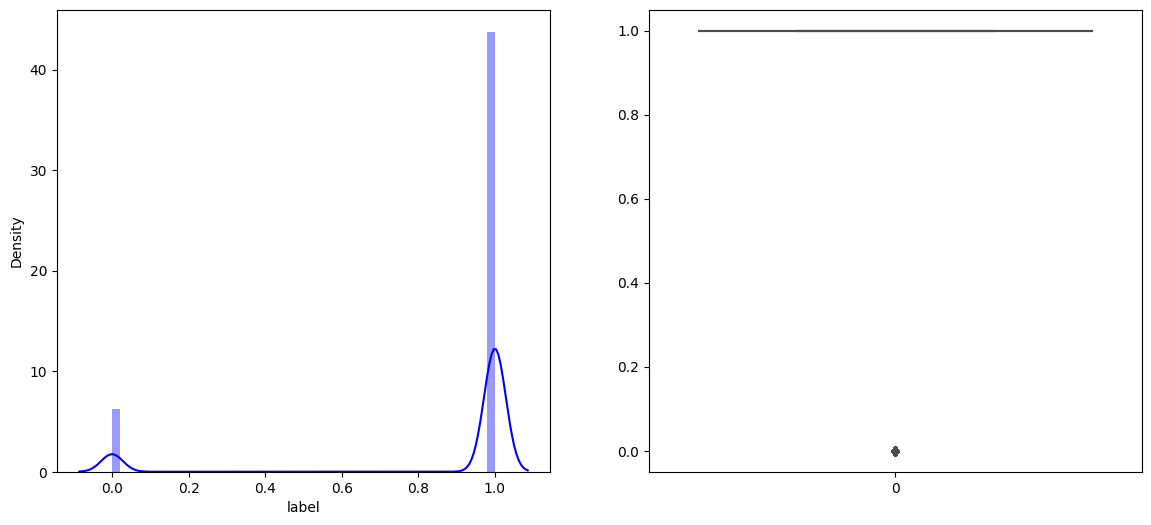

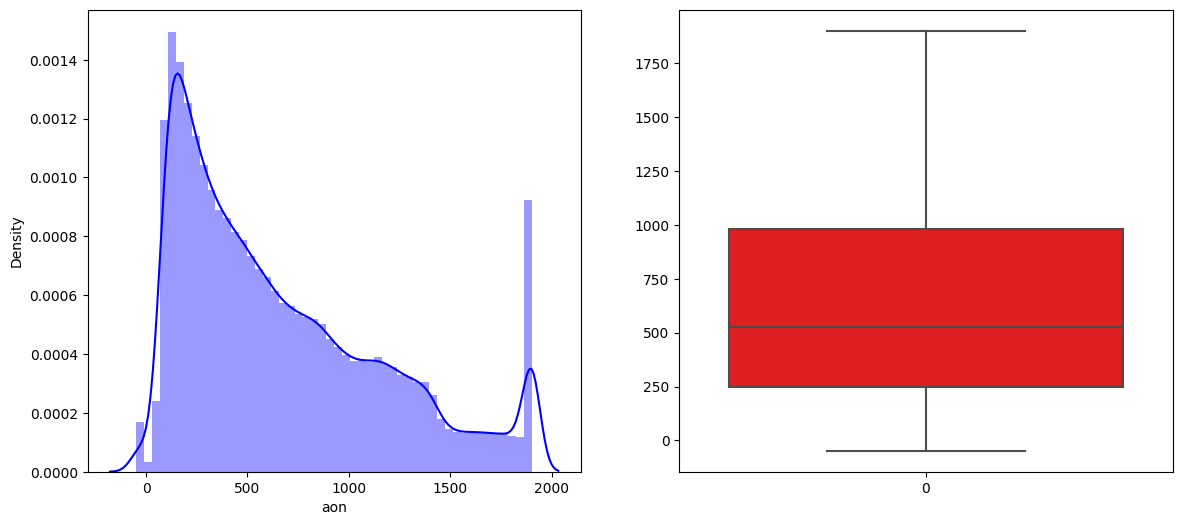

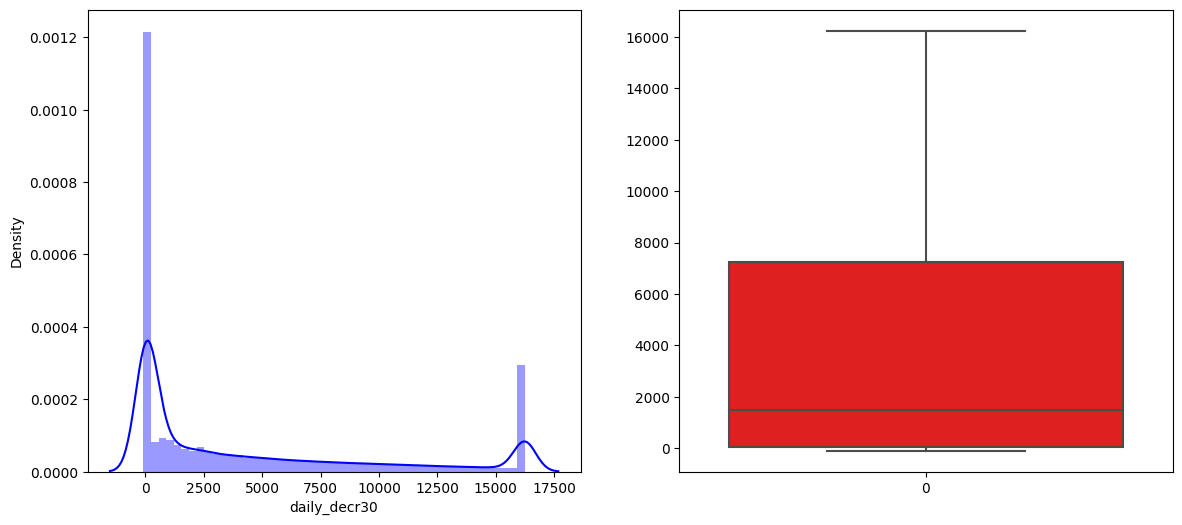

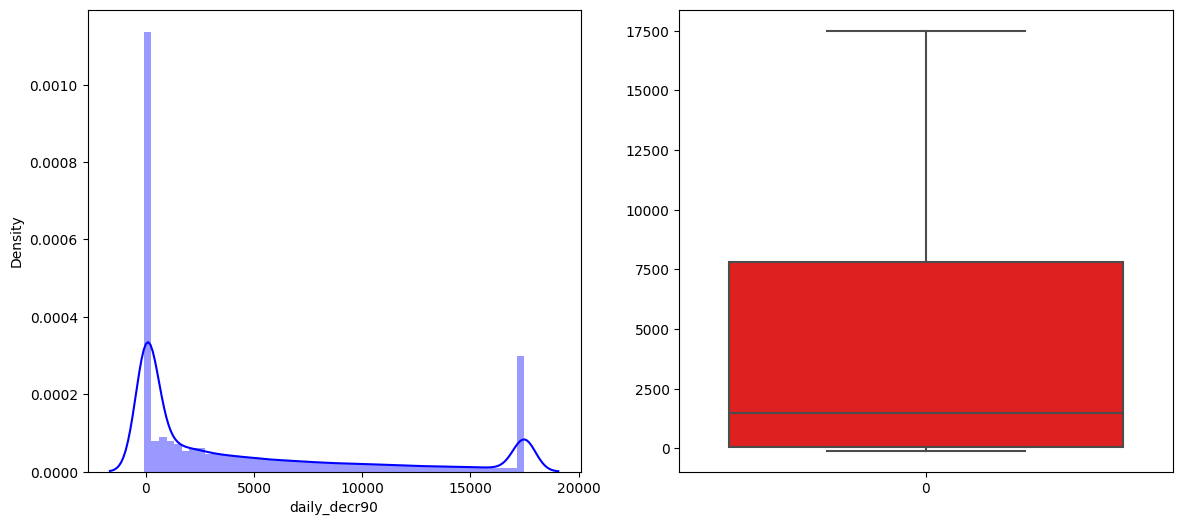

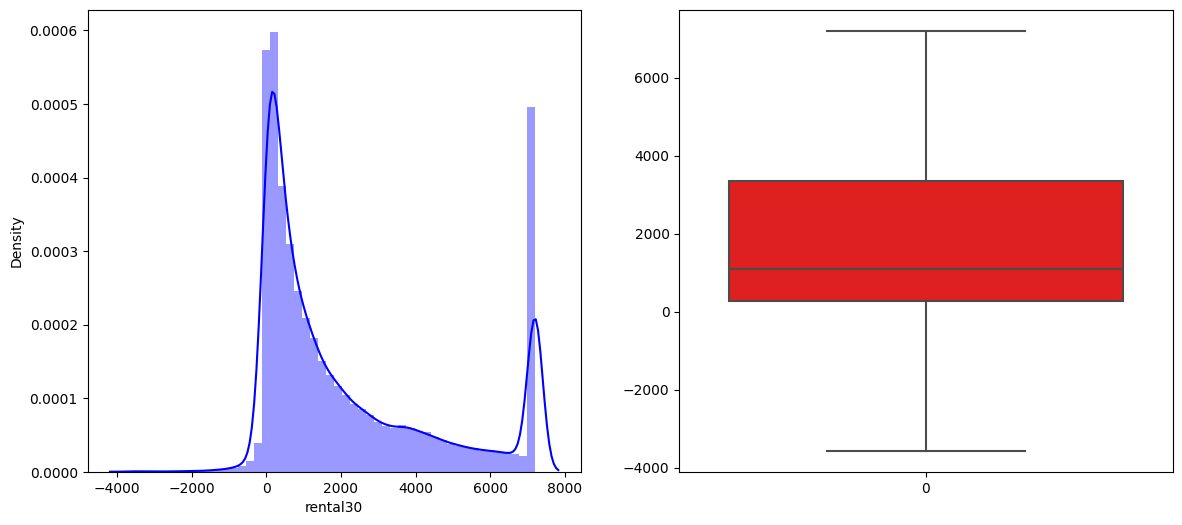

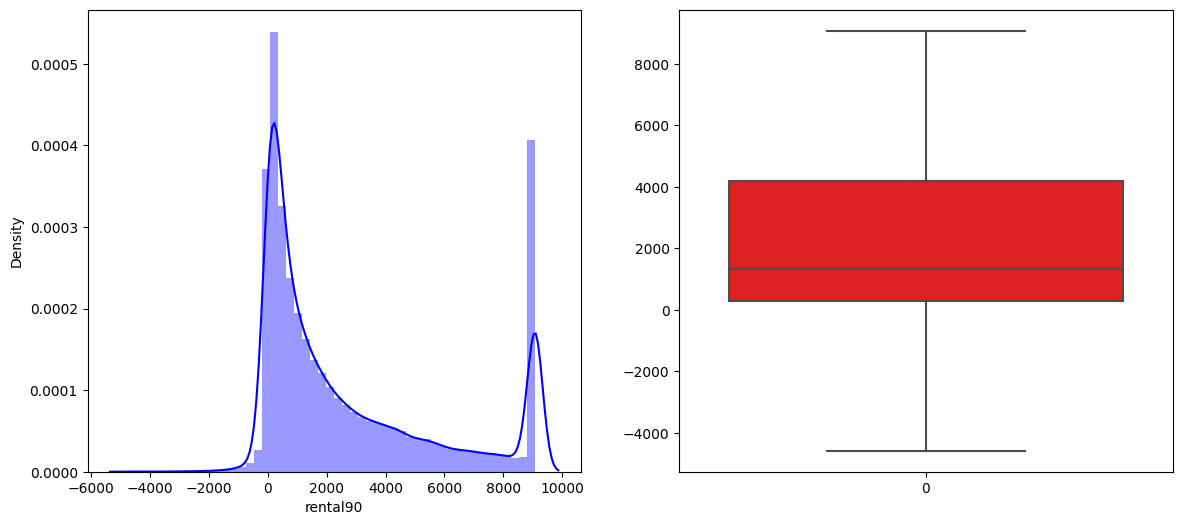

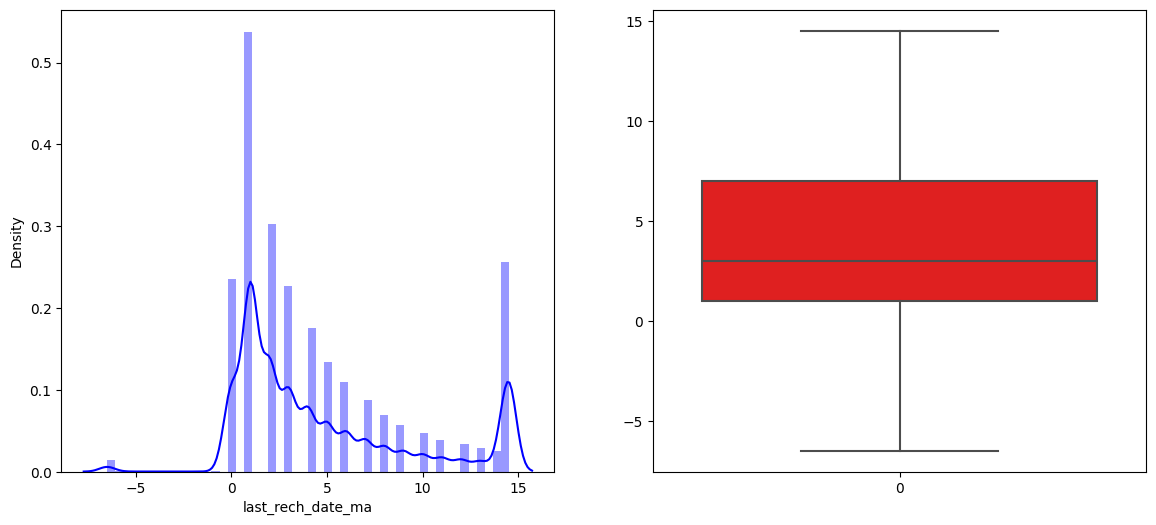

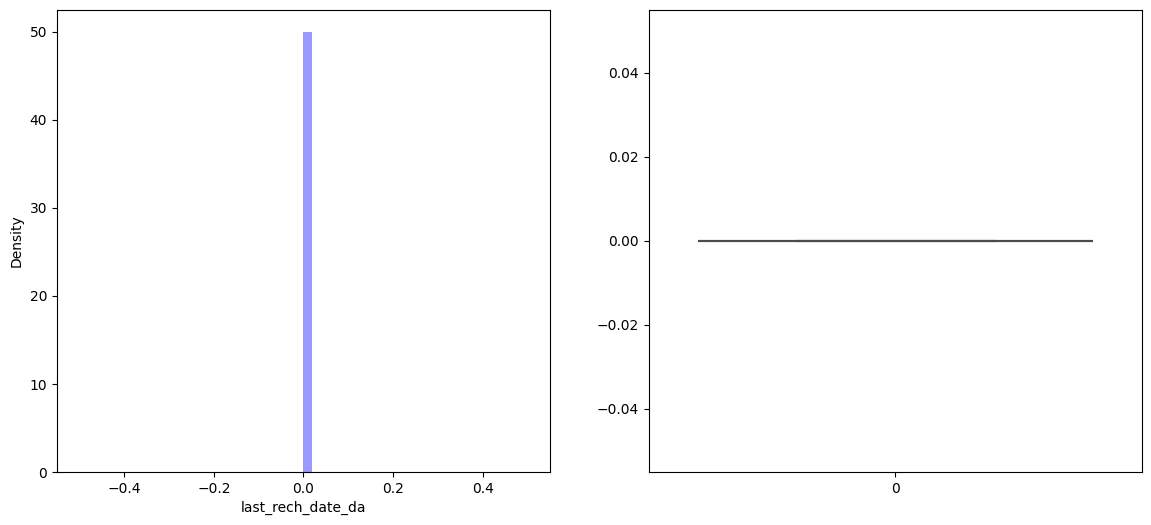

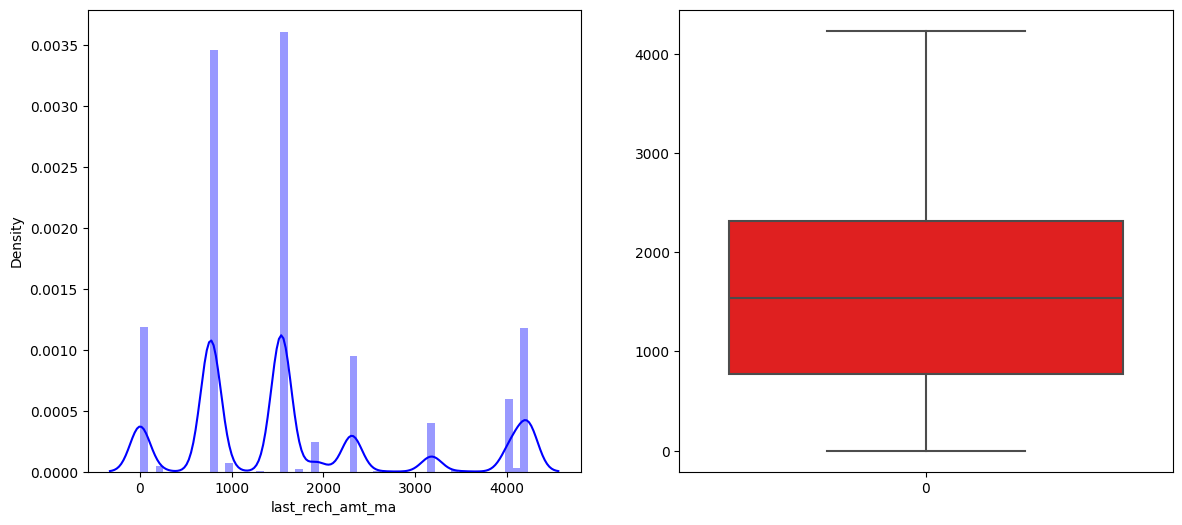

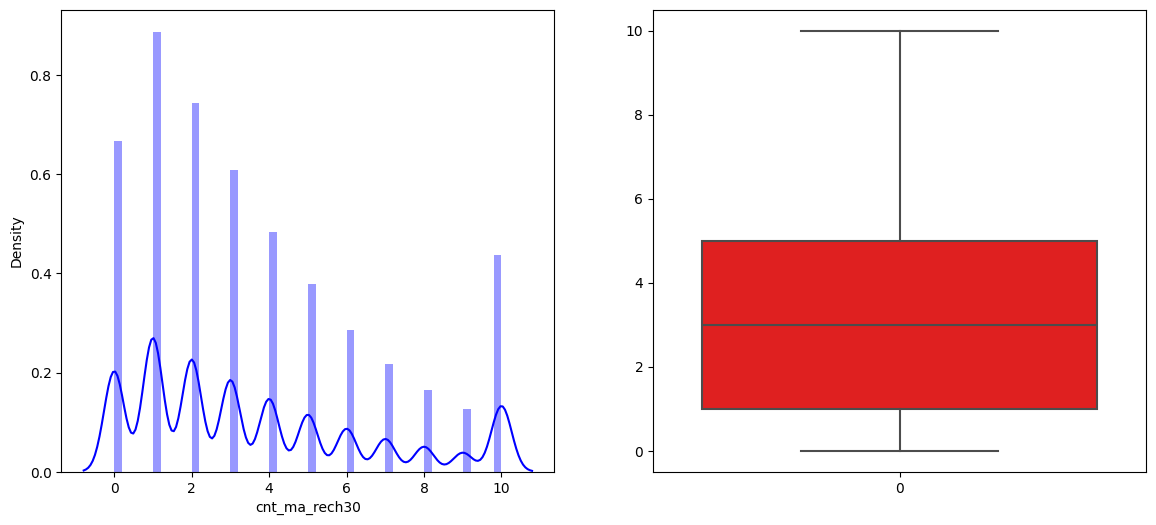

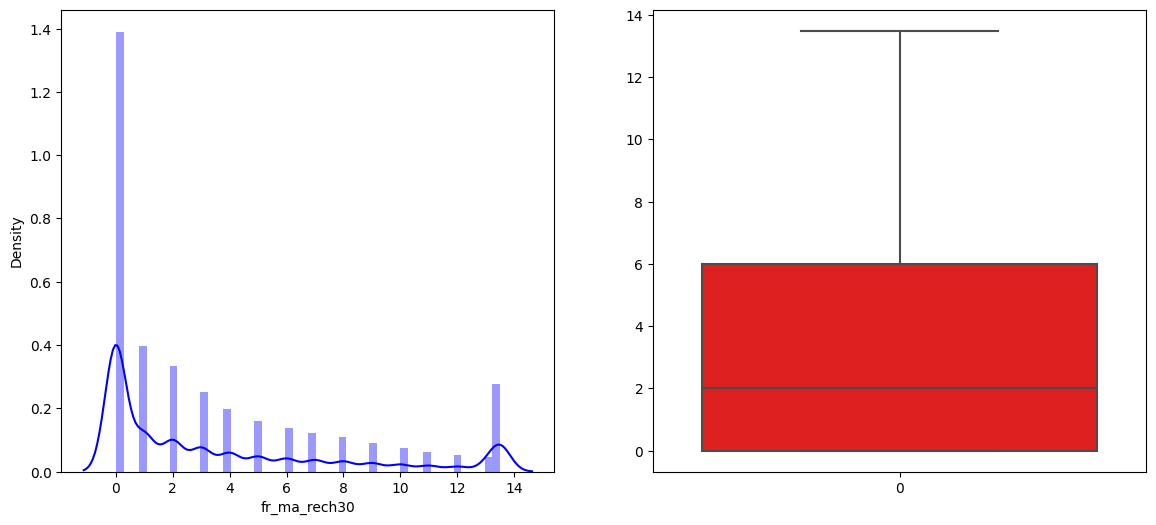

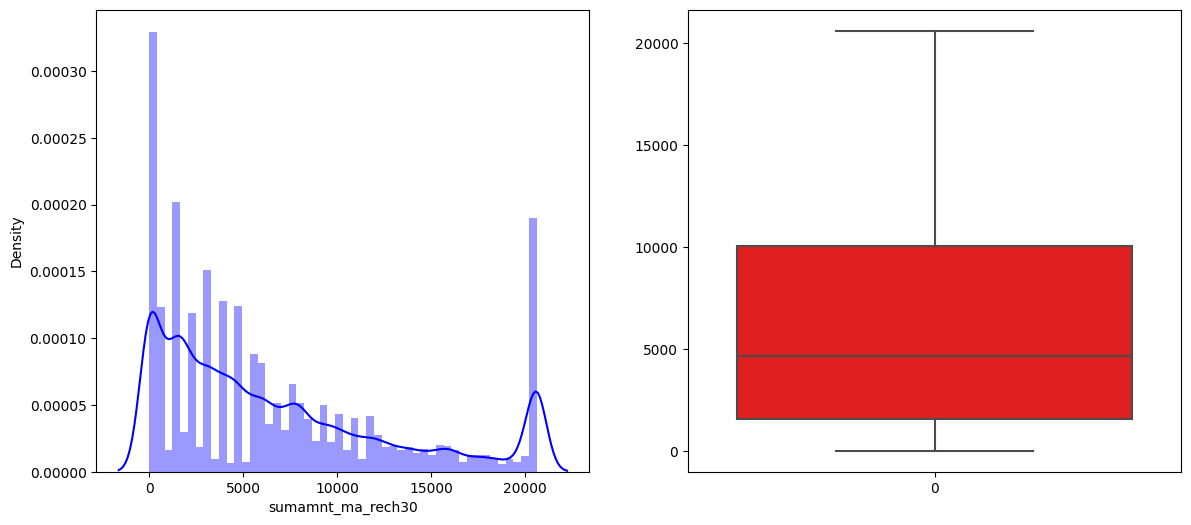

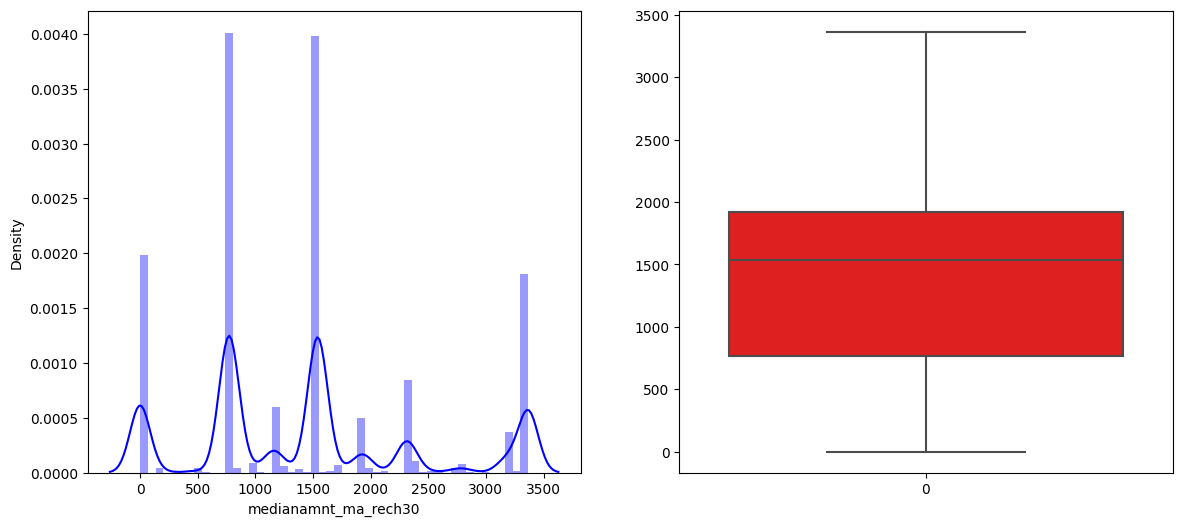

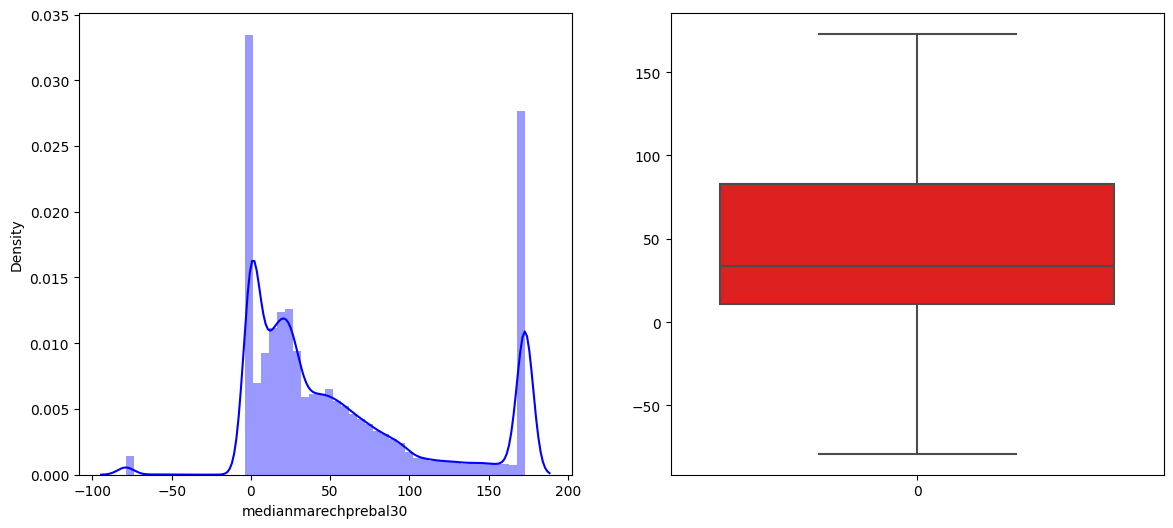

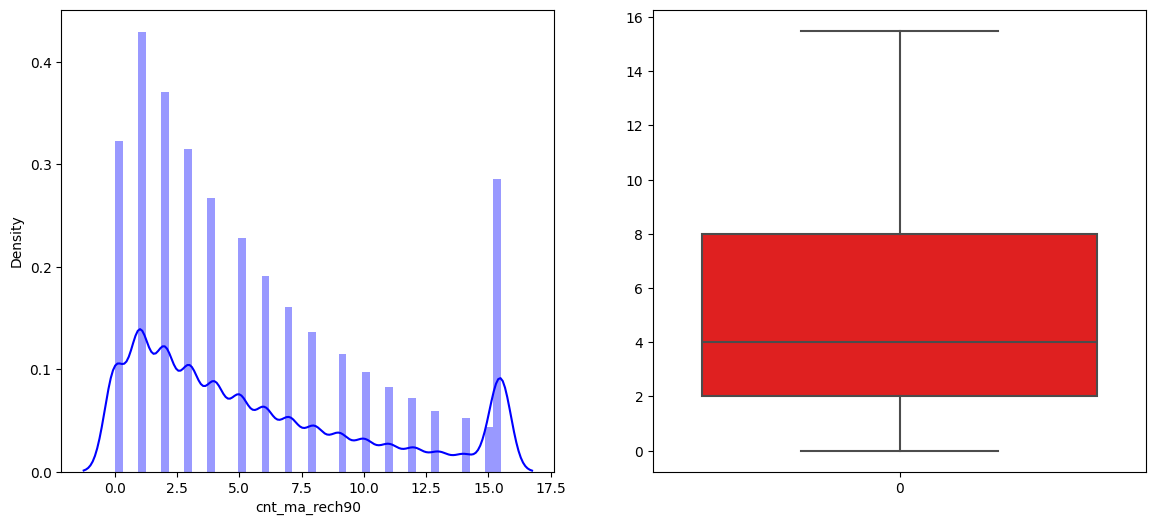

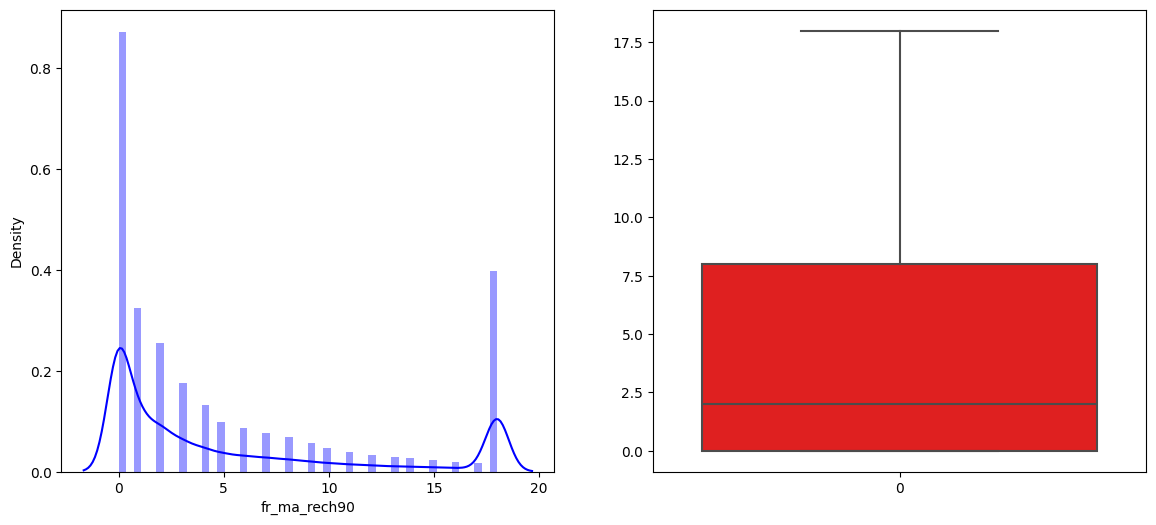

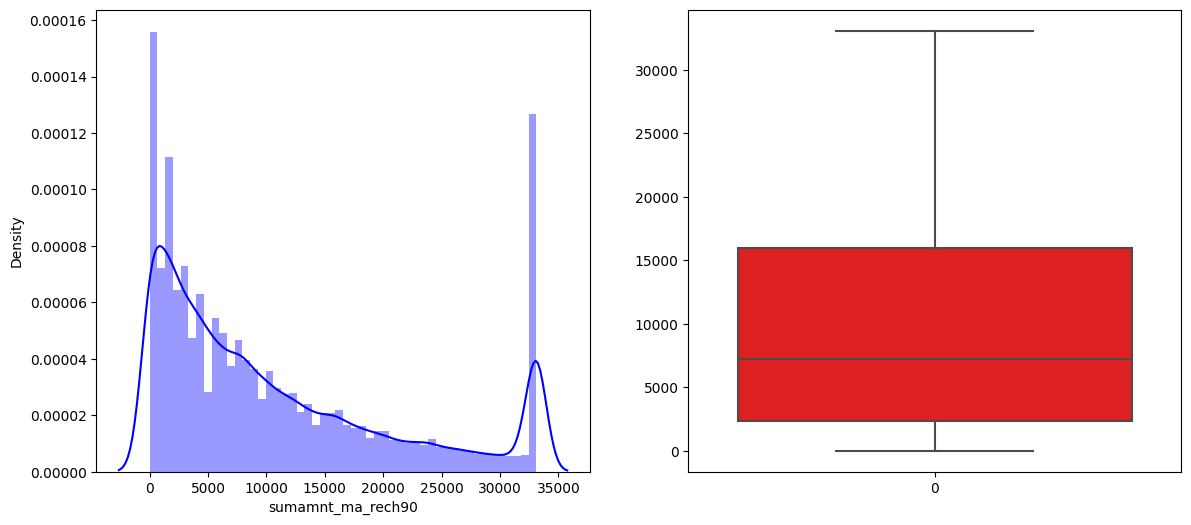

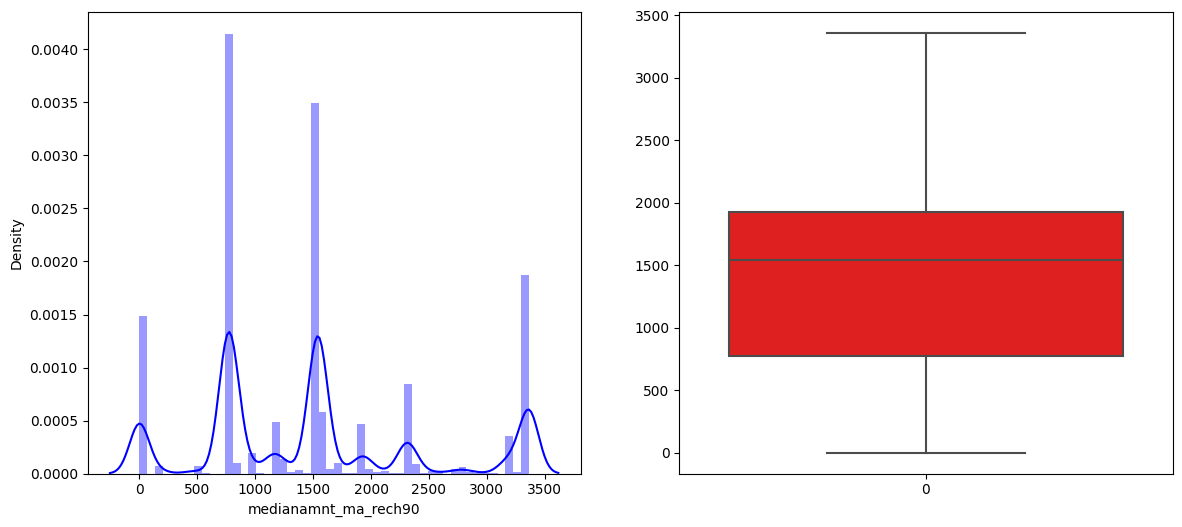

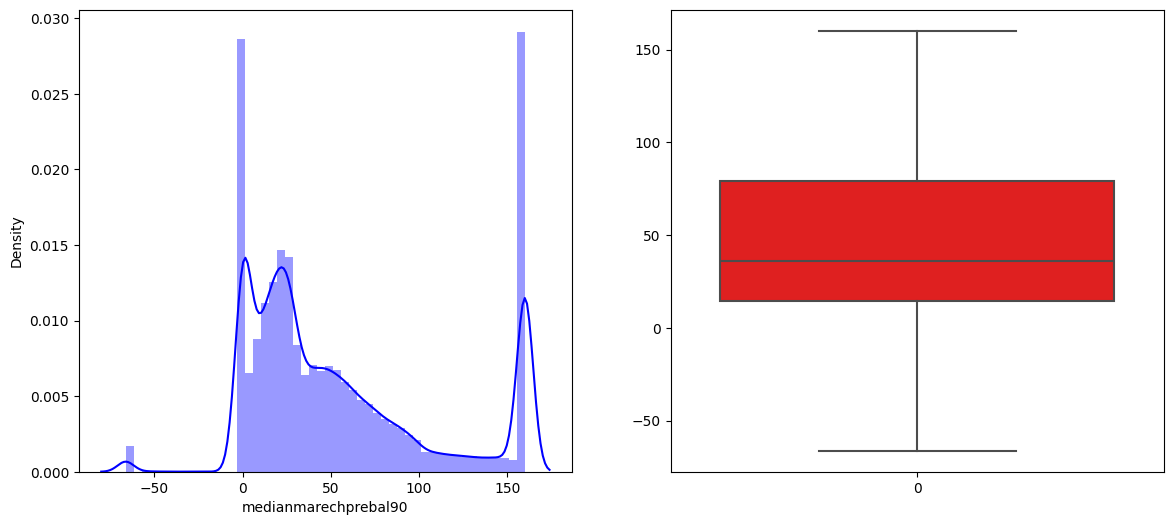

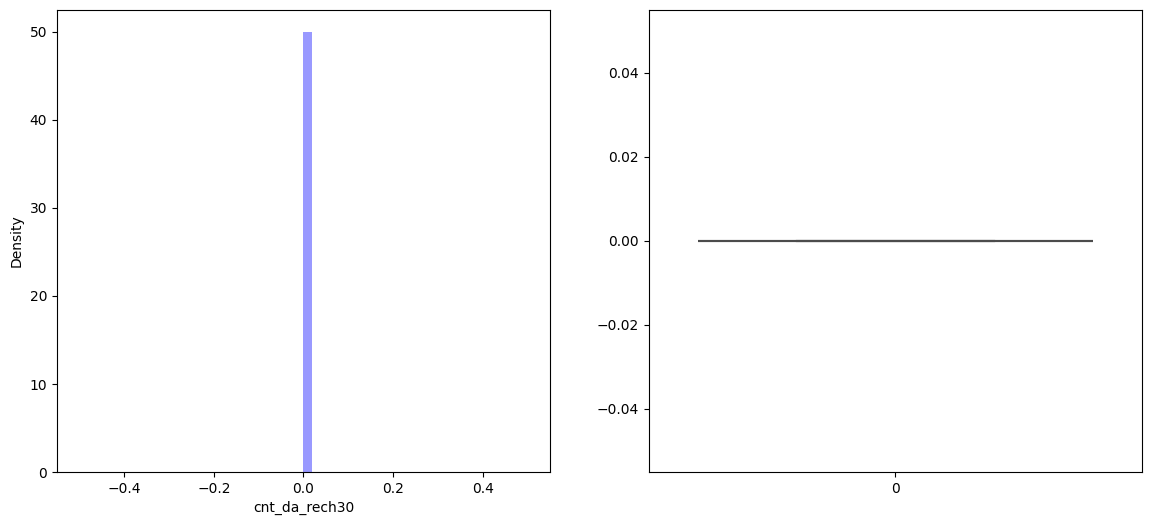

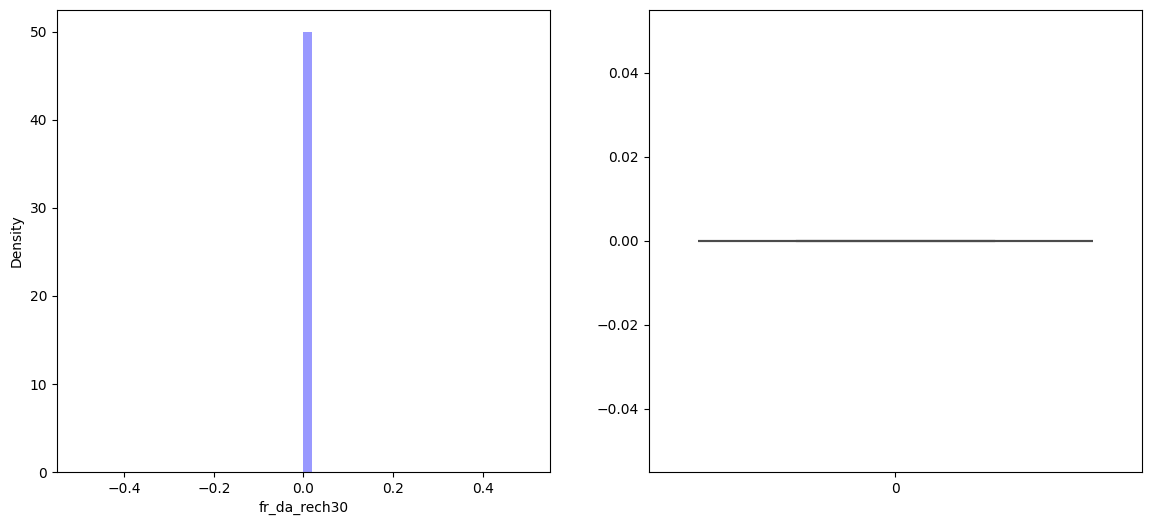

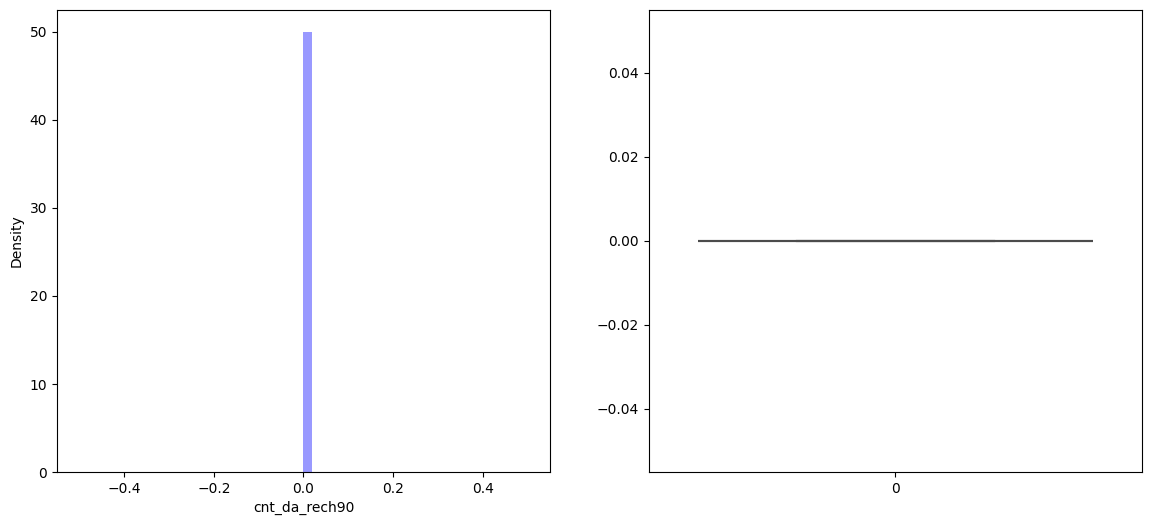

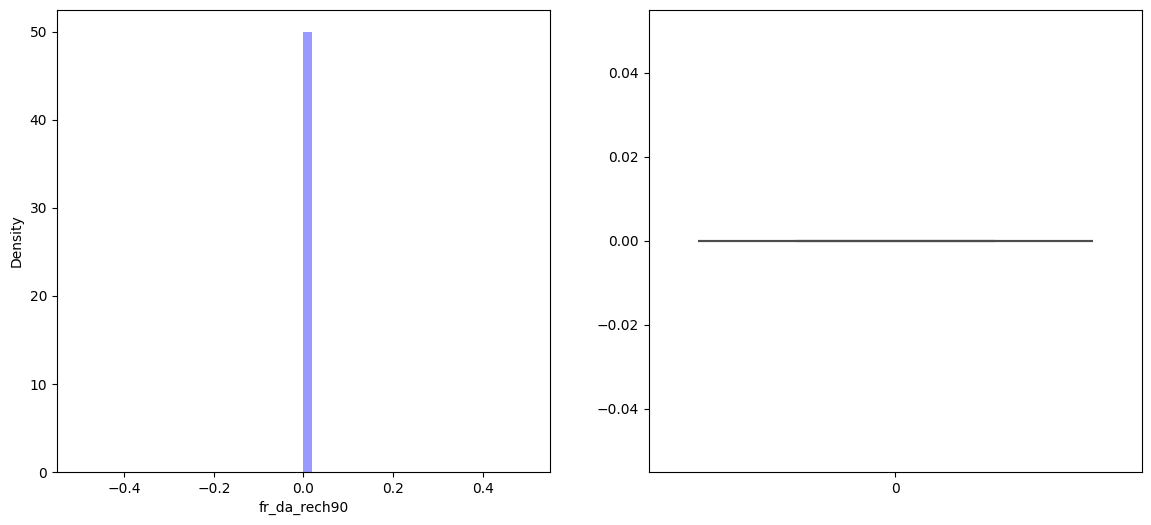

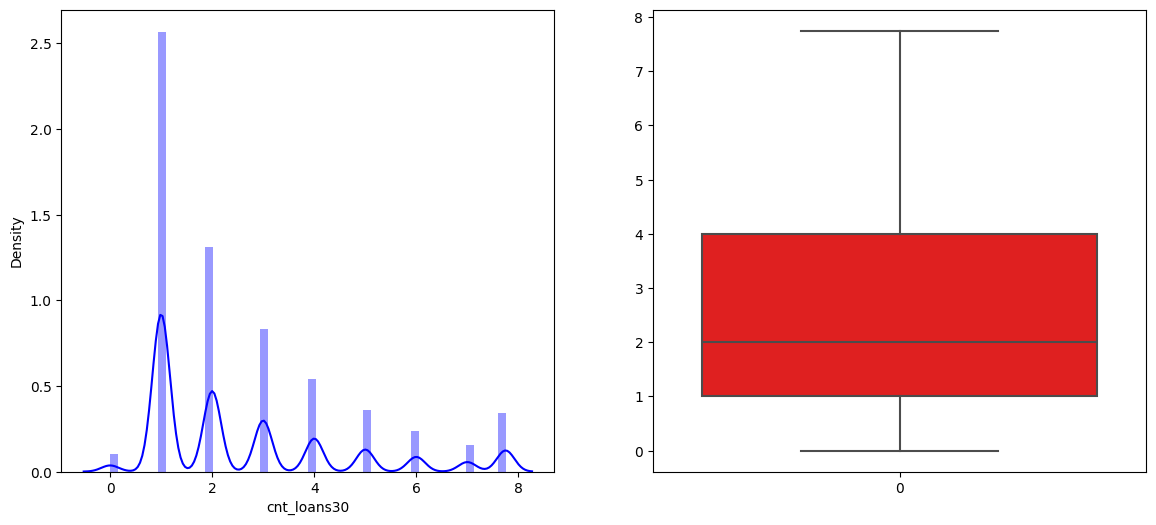

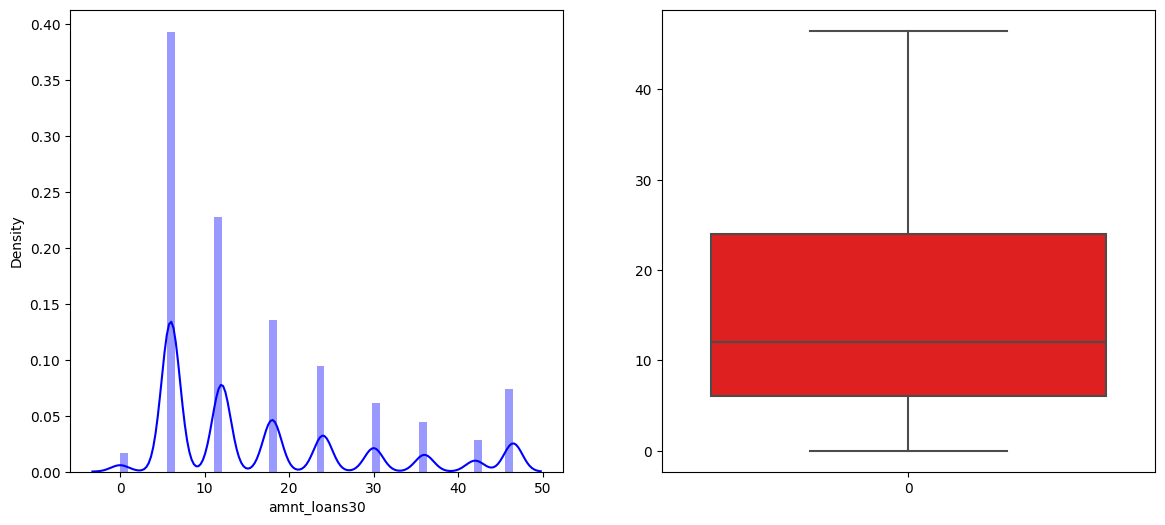

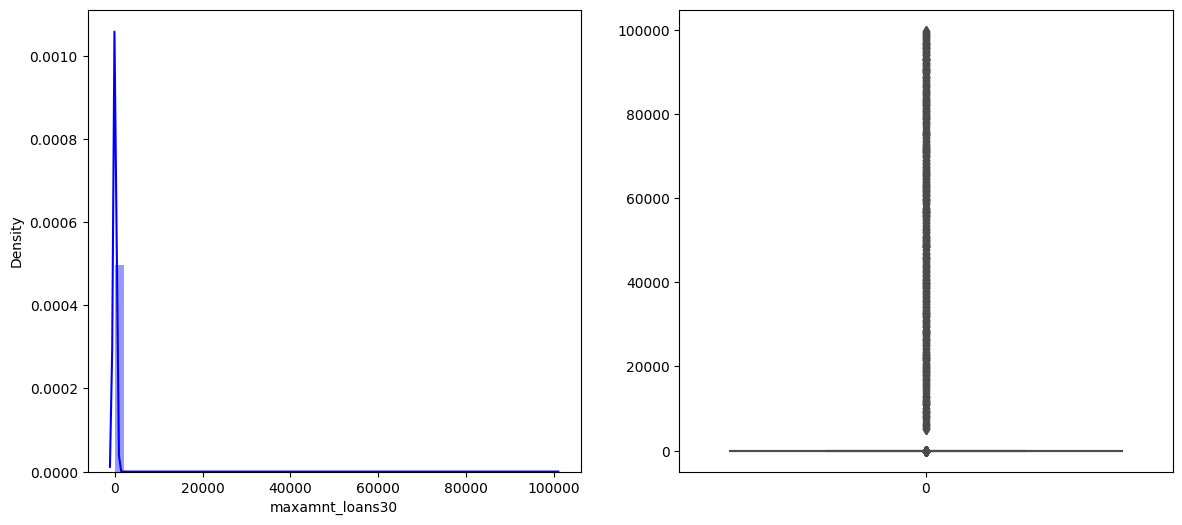

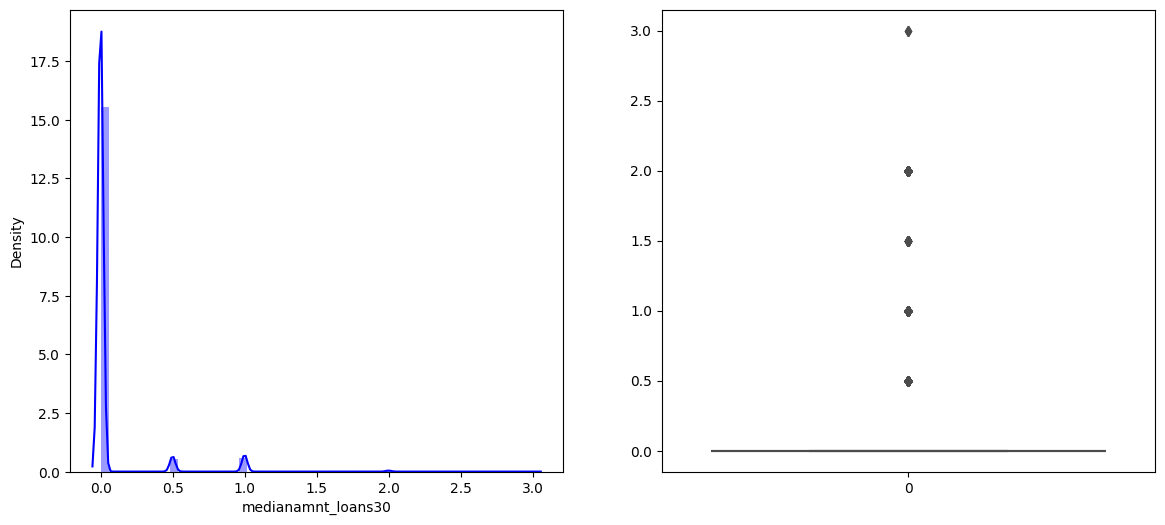

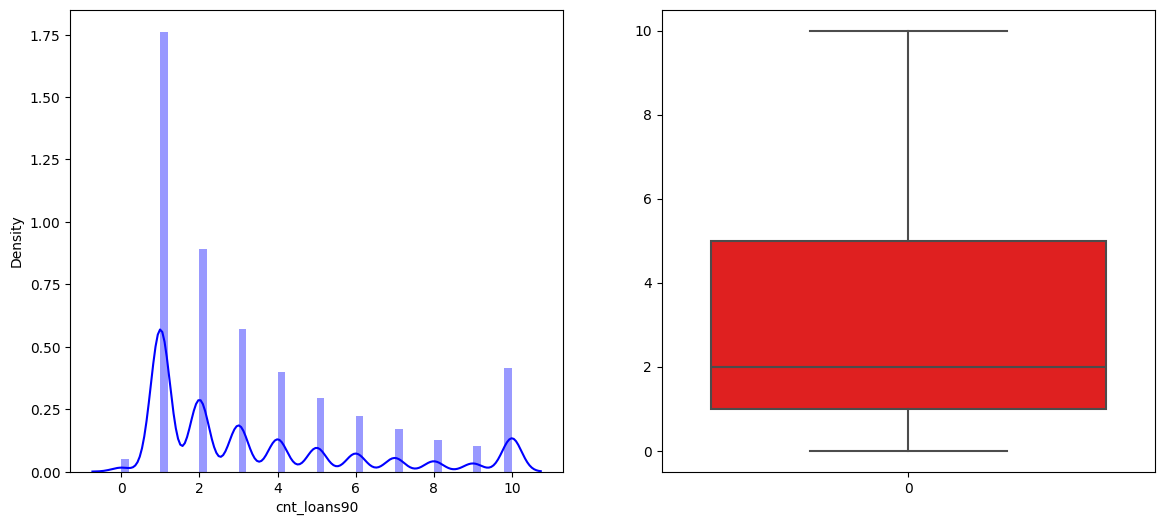

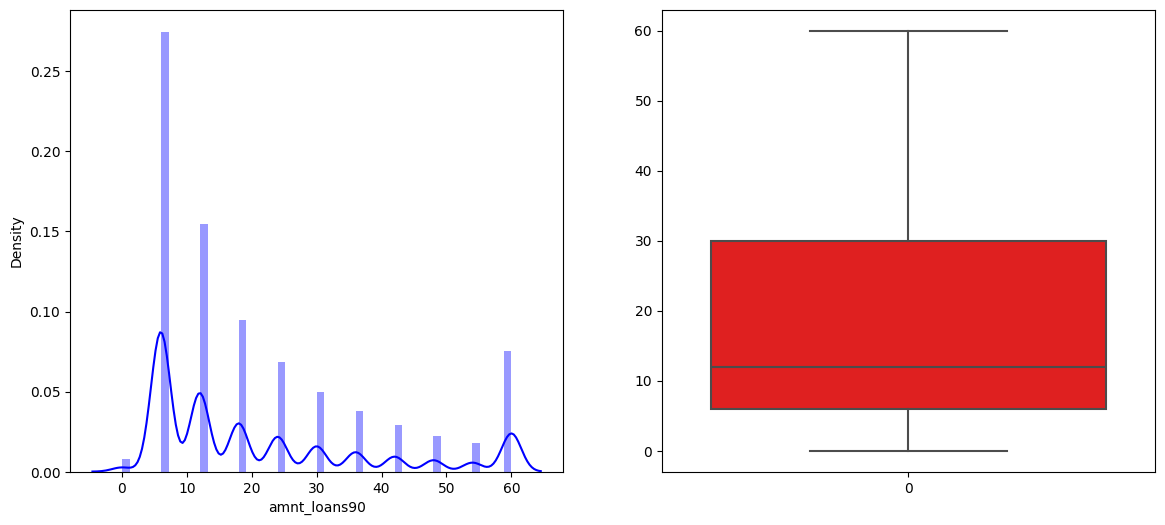

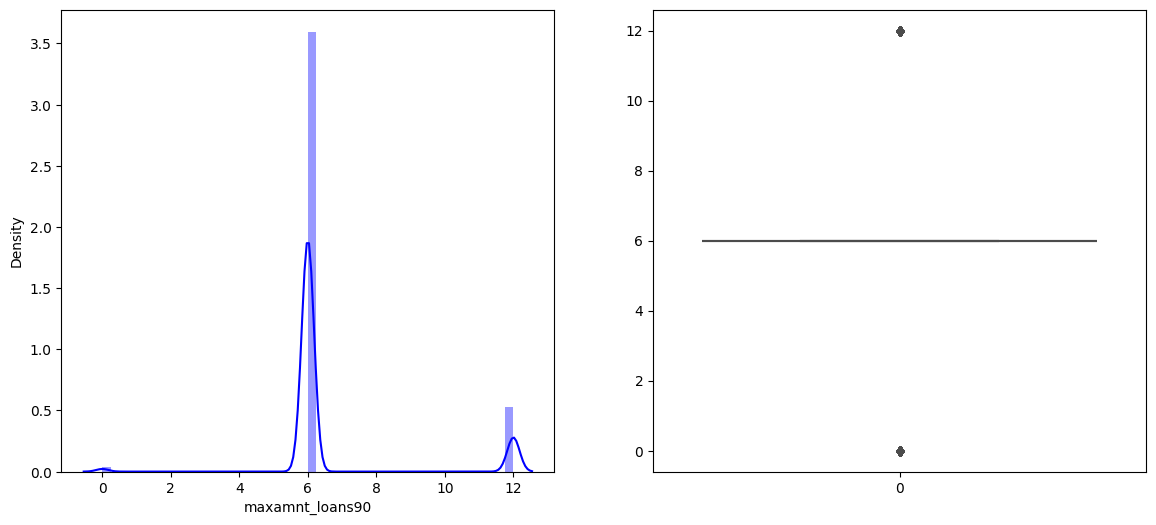

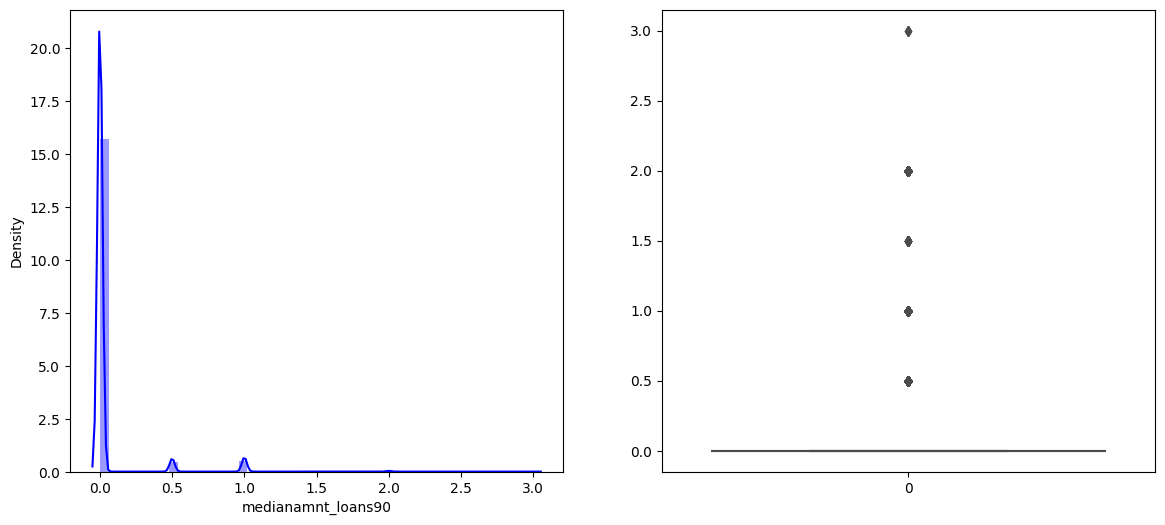

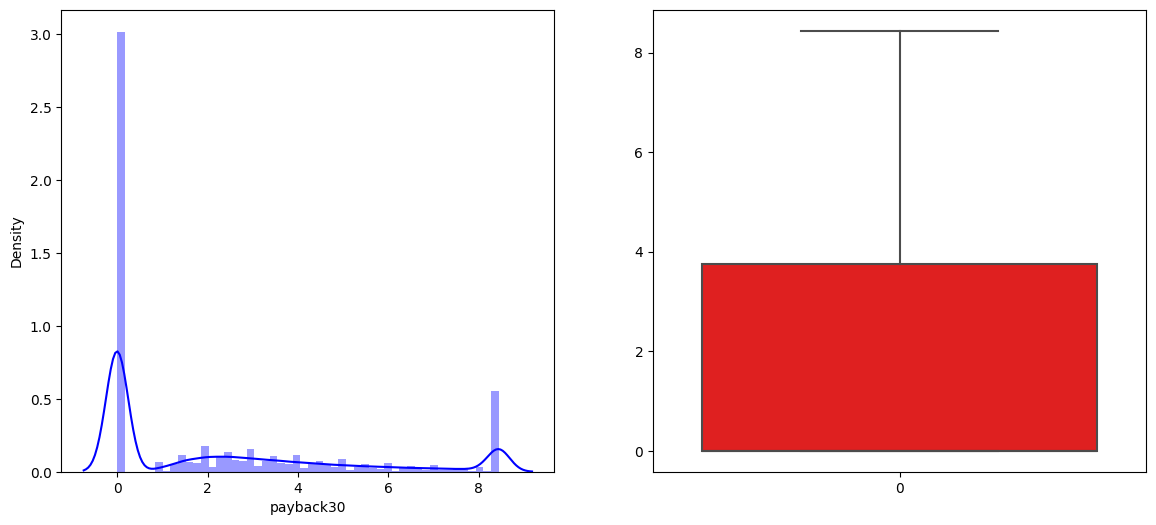

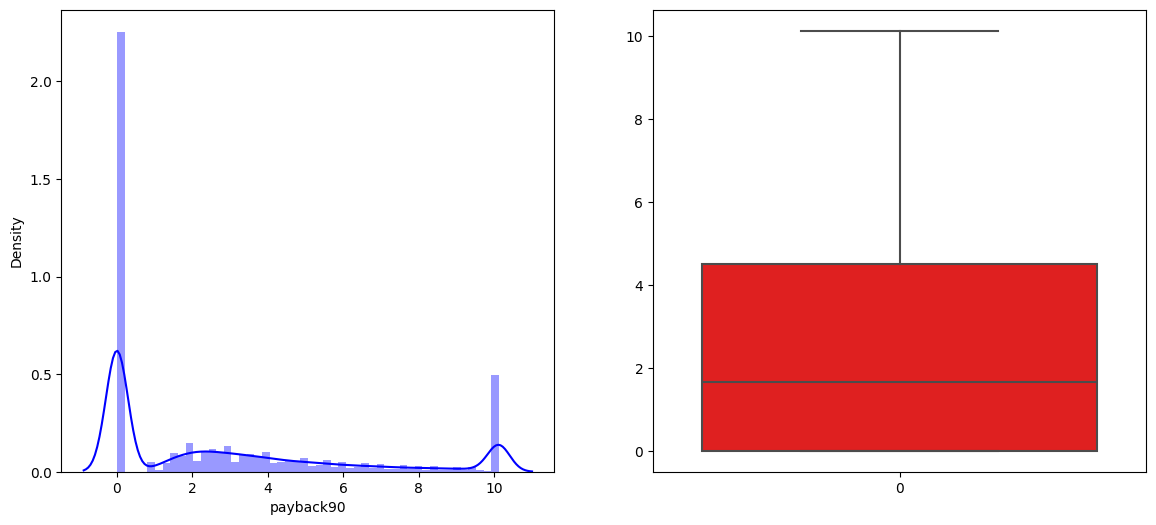

In [16]:
for i in df.columns:
    graph(df,i)

In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
label,209593.0,0.875177,0.330519,0.000000,1.000,1.000000,1.00,1.000000
aon,209593.0,664.022978,502.767129,-48.000000,246.000,527.000000,982.00,1902.000000
daily_decr30,209593.0,4314.082641,5514.690048,-93.012667,42.440,1469.175667,7244.00,16245.950000
daily_decr90,209593.0,4672.122961,6036.477134,-93.012667,42.692,1500.000000,7802.79,17502.912500
rental30,209593.0,2124.120135,2392.268994,-3565.230000,280.420,1083.570000,3356.94,7202.590000
rental90,209593.0,2672.397339,3040.714660,-4576.652500,300.260,1334.000000,4201.79,9078.702500
last_rech_date_ma,209593.0,4.694458,4.724986,-6.500000,1.000,3.000000,7.00,14.500000
last_rech_date_da,209593.0,0.000000,0.000000,0.000000,0.000,0.000000,0.00,0.000000
last_rech_amt_ma,209593.0,1680.788093,1265.877121,0.000000,770.000,1539.000000,2309.00,4232.750000
cnt_ma_rech30,209593.0,3.614777,3.049253,0.000000,1.000,3.000000,5.00,10.000000


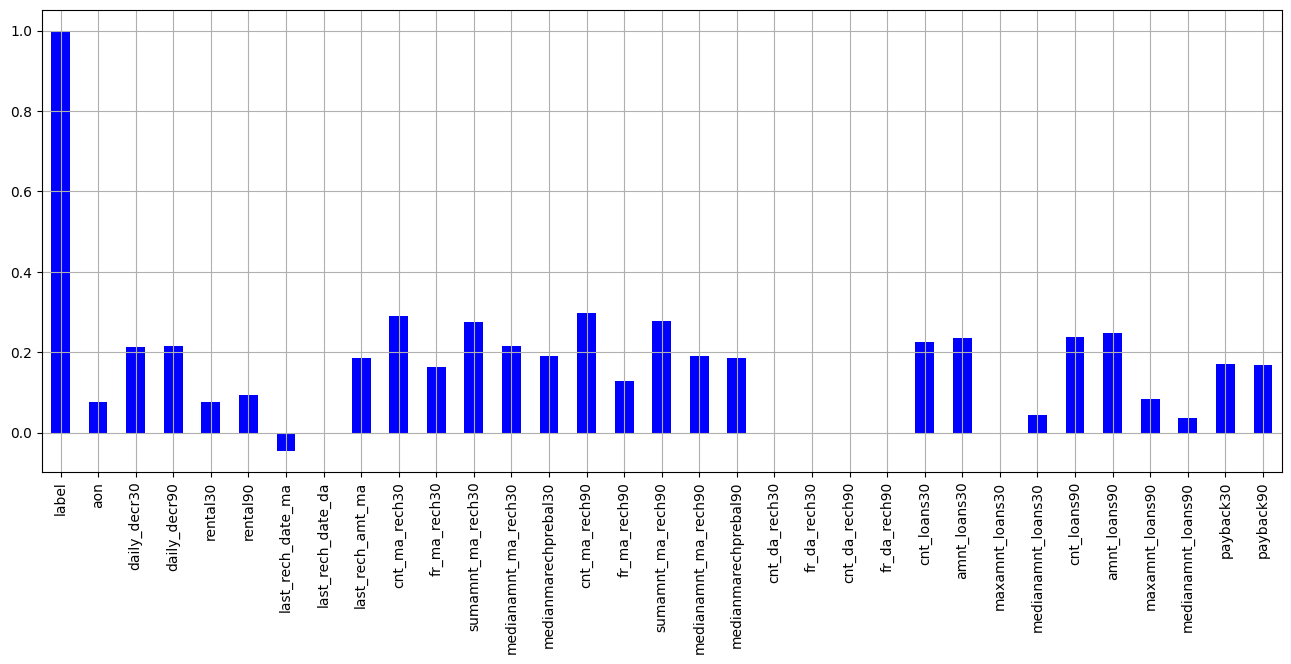

In [18]:
df.corrwith(df['label']).plot(kind='bar',grid = True, figsize=(16,6), color='blue')
plt.show()


In [19]:
df.skew()

label                   -2.270254
aon                      0.859469
daily_decr30             1.128563
daily_decr90             1.132084
rental30                 1.077084
rental90                 1.078299
last_rech_date_ma        0.944700
last_rech_date_da        0.000000
last_rech_amt_ma         0.881053
cnt_ma_rech30            0.774796
fr_ma_rech30             1.133385
sumamnt_ma_rech30        0.946429
medianamnt_ma_rech30     0.569947
medianmarechprebal30     0.899169
cnt_ma_rech90            0.810947
fr_ma_rech90             1.070414
sumamnt_ma_rech90        0.997038
medianamnt_ma_rech90     0.604827
medianmarechprebal90     0.864082
cnt_da_rech30            0.000000
fr_da_rech30             0.000000
cnt_da_rech90            0.000000
fr_da_rech90             0.000000
cnt_loans30              1.211929
amnt_loans30             1.102369
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90              1.154202
amnt_loans90             1.091910
maxamnt_loans9

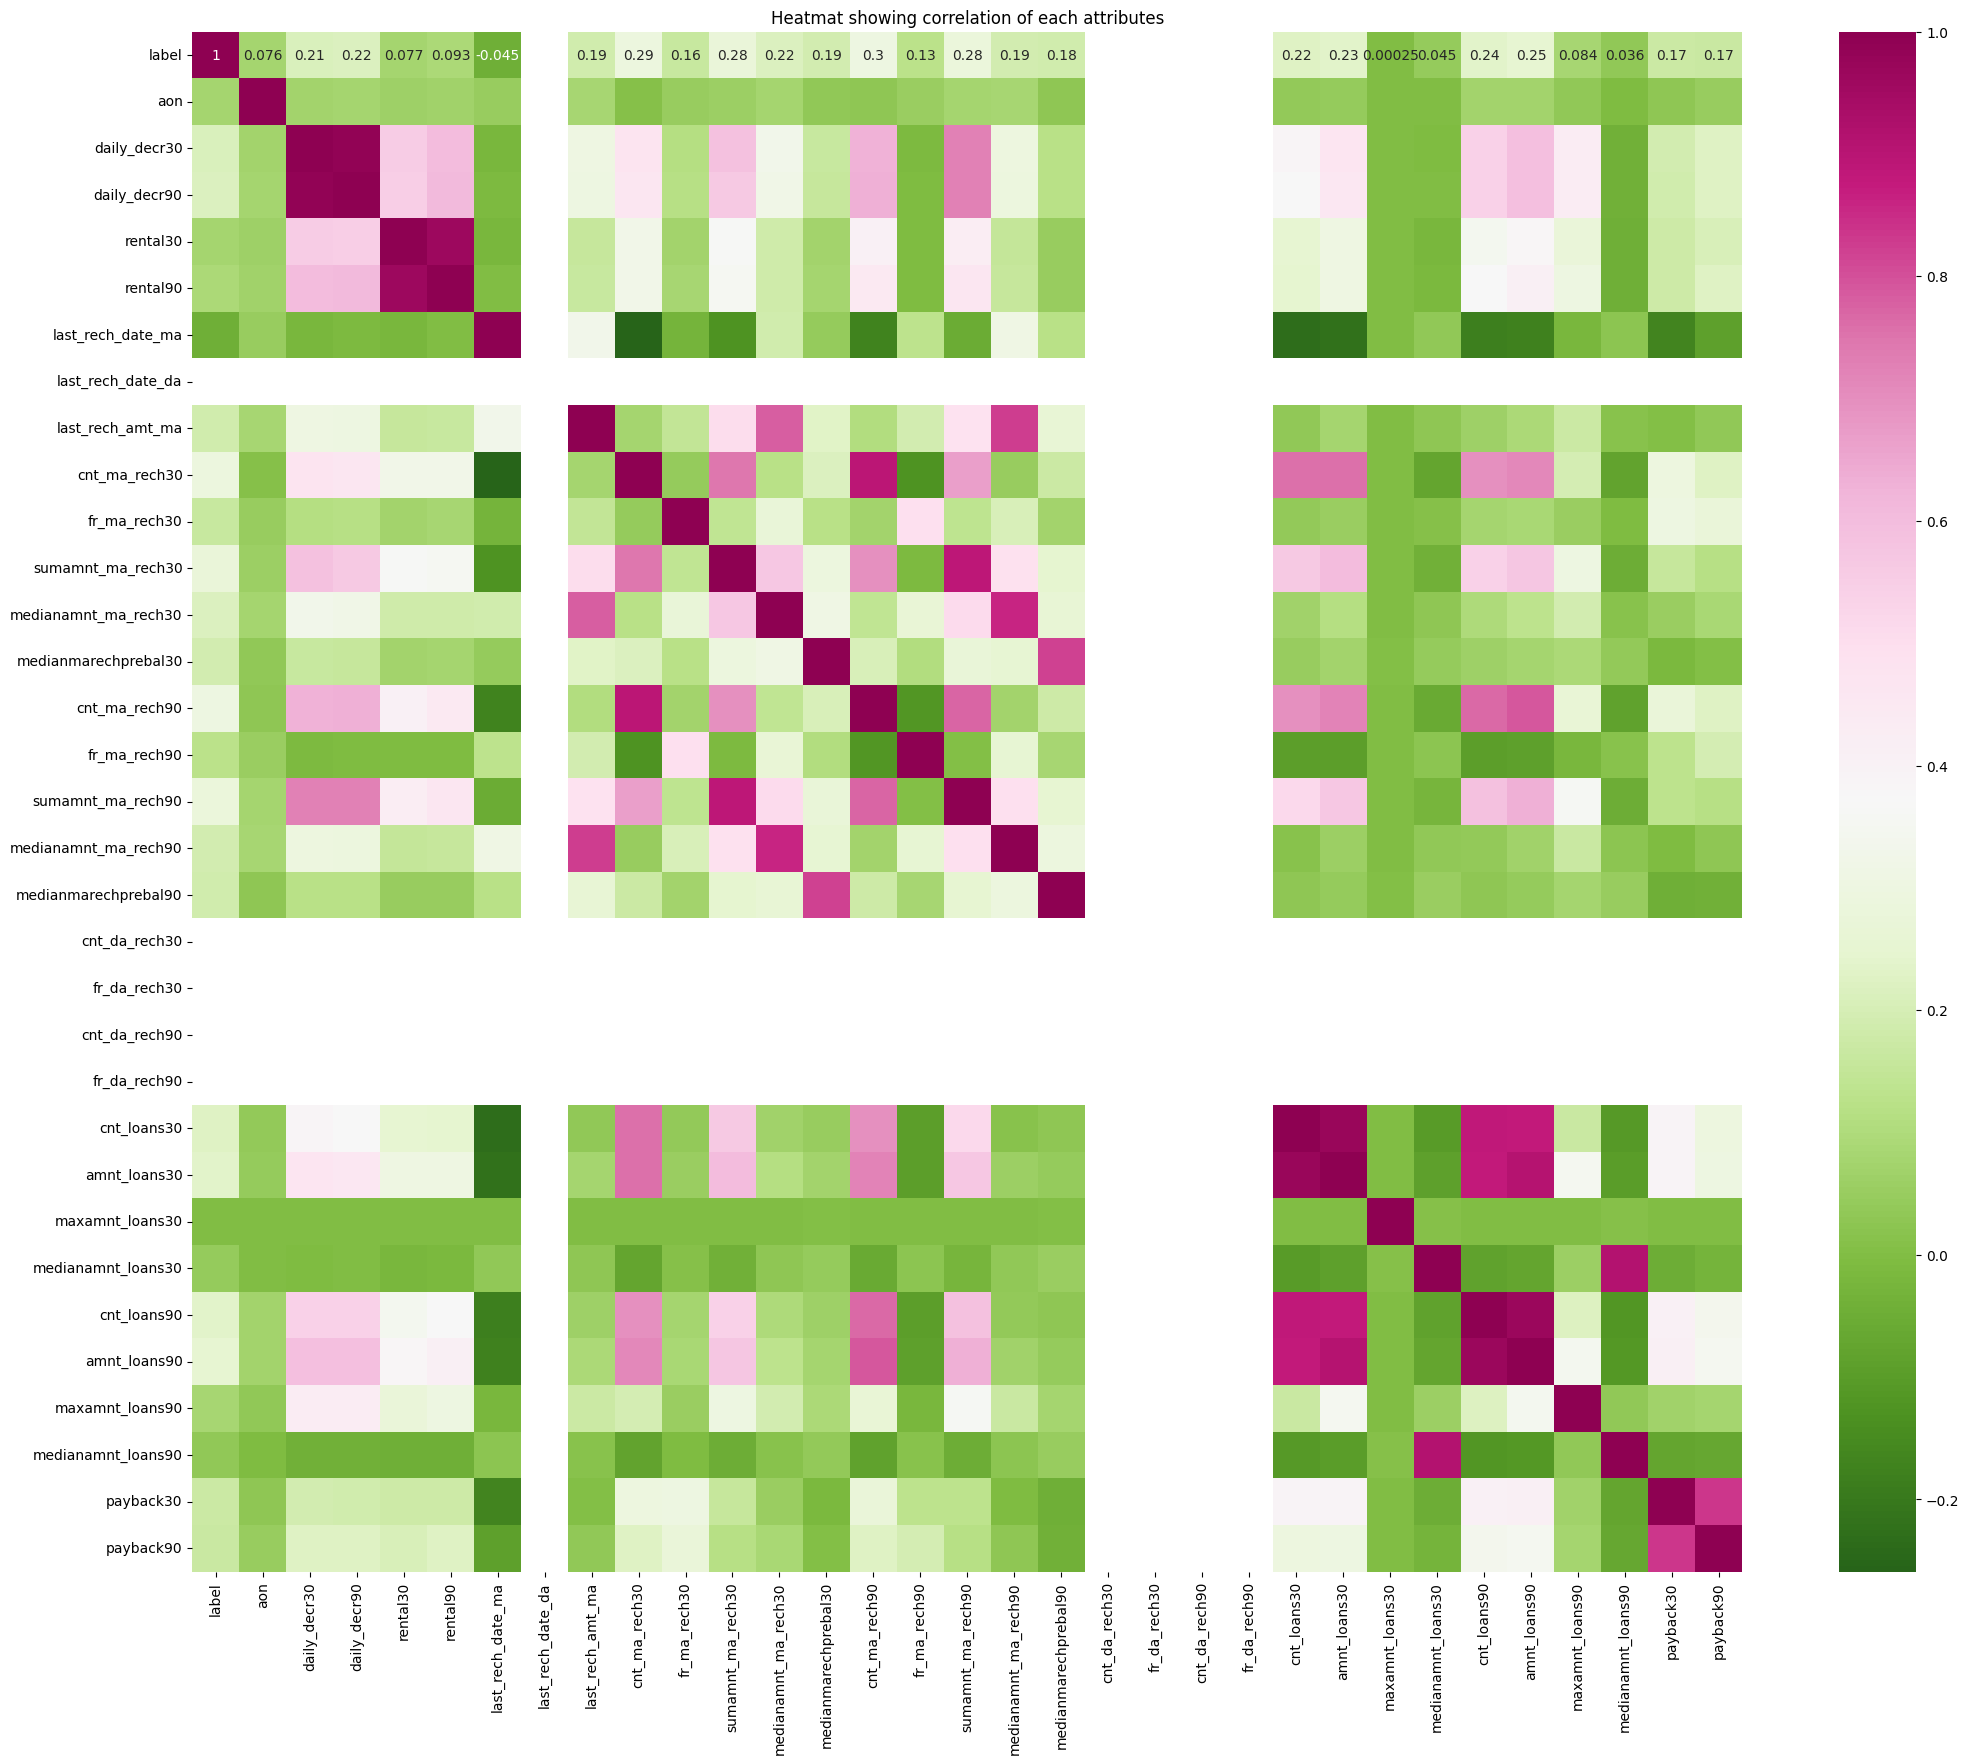

In [20]:
corr = df.corr()
plt.figure(figsize=(25,20), facecolor='white')
sns.heatmap(corr, annot=True, cmap='PiYG_r')
plt.title('Heatmat showing correlation of each attributes')
plt.show()

In [21]:
df.drop(columns=['cnt_da_rech30','cnt_da_rech90','fr_da_rech30','fr_da_rech90','last_rech_date_da','maxamnt_loans30'], inplace=True, axis=1)


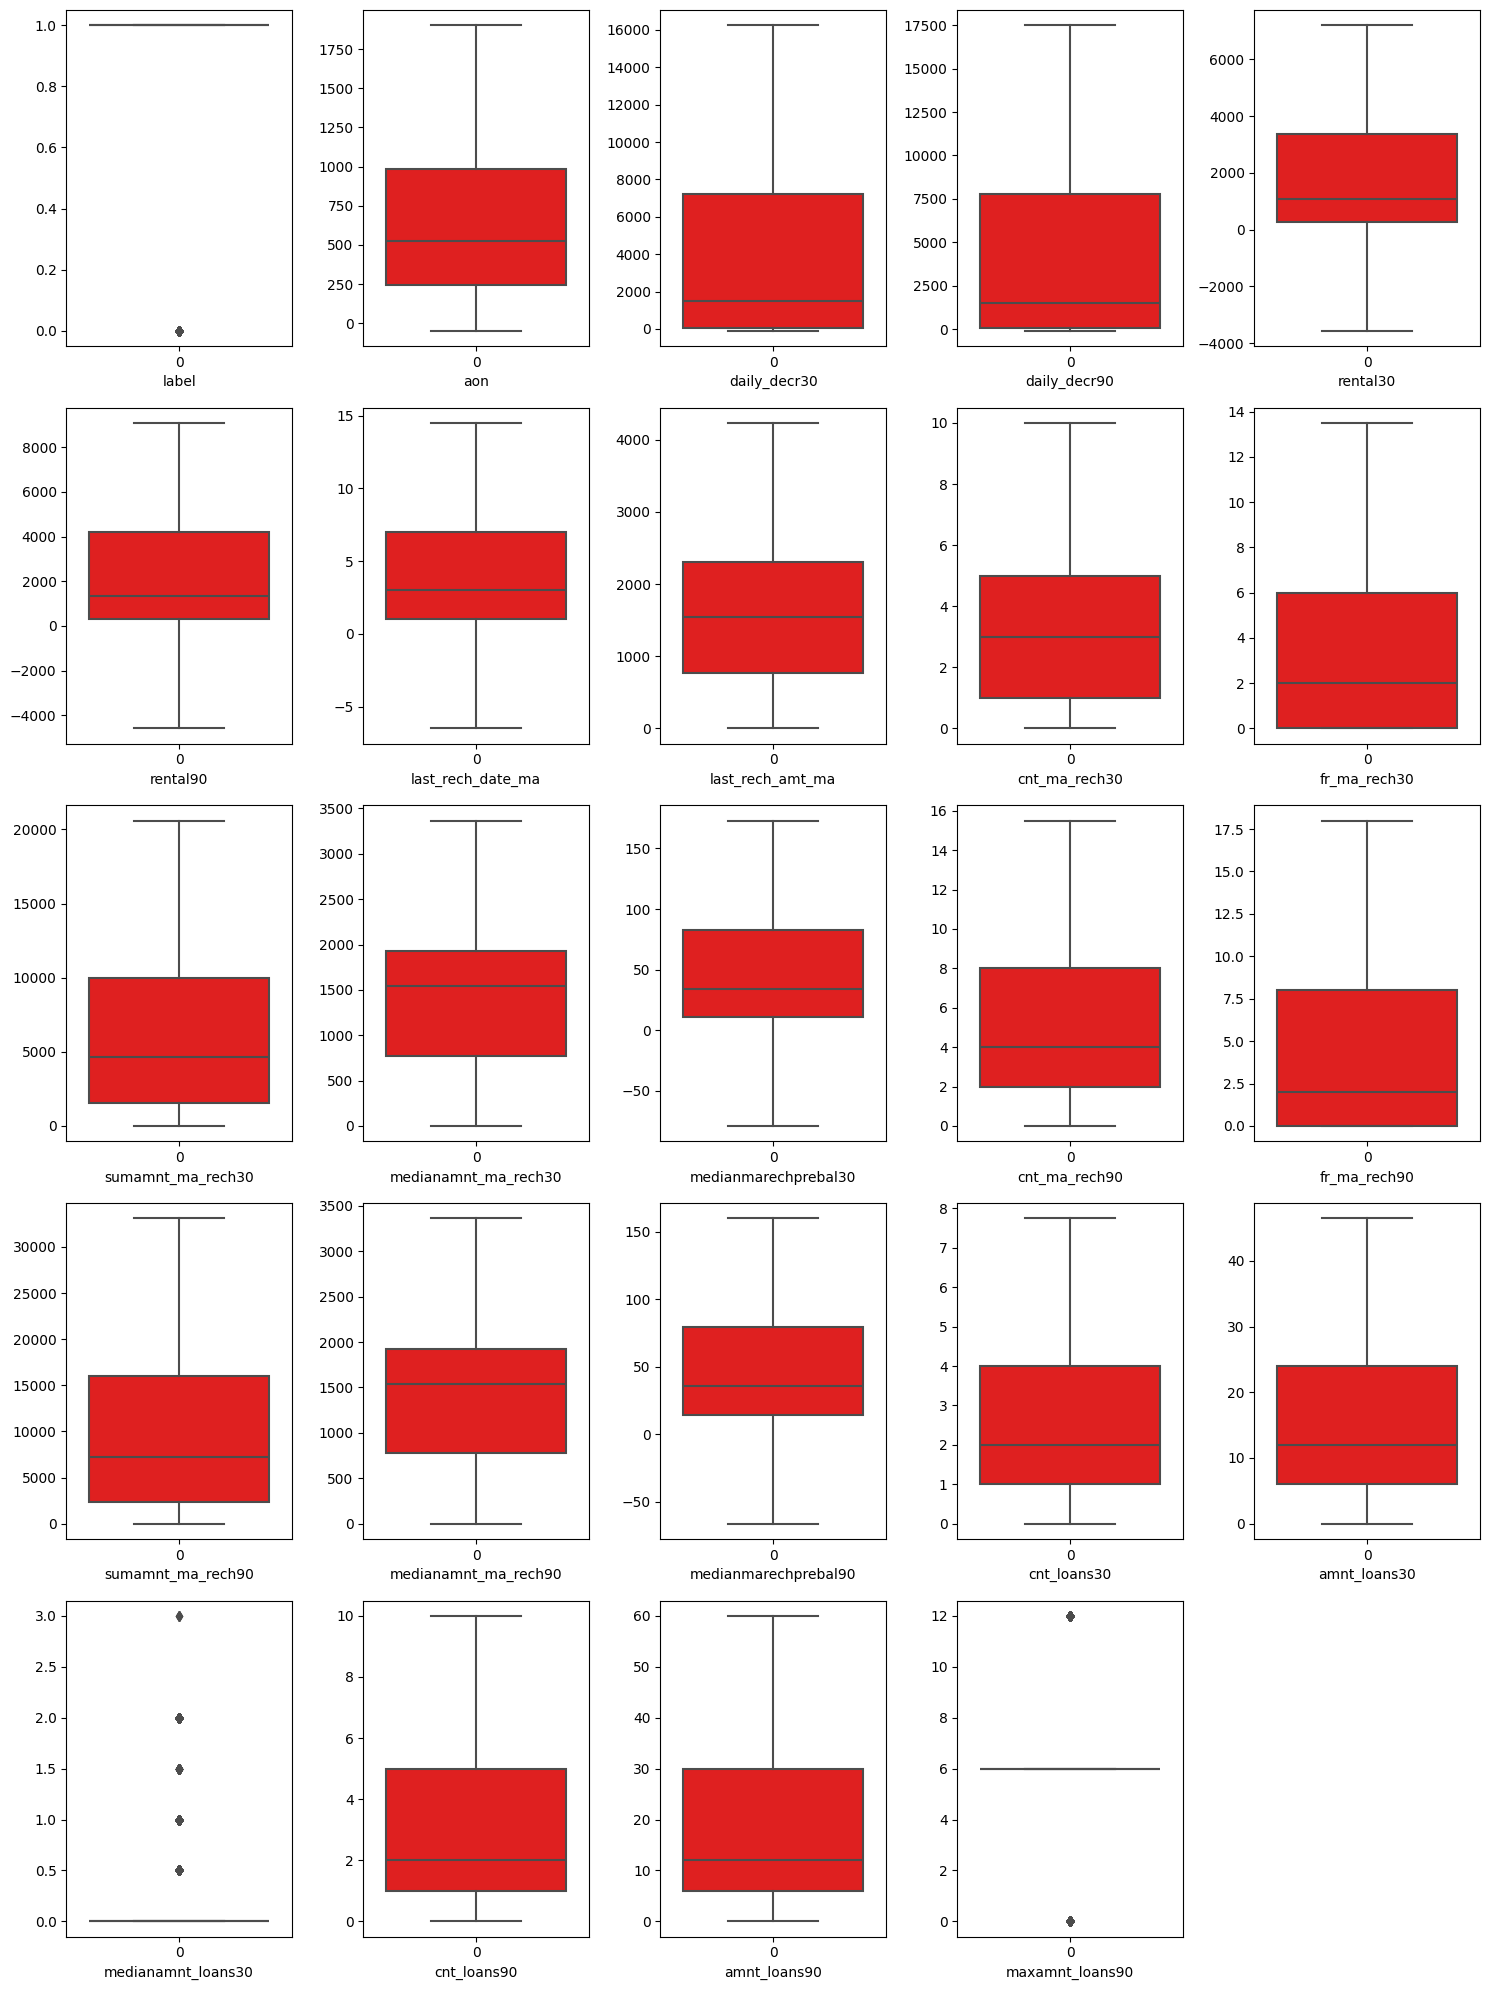

In [22]:
plt.figure(figsize=(15,20))
graph = 1
for col in df:
    if graph<25:
        ax = plt.subplot(5,5,graph)
        sns.boxplot(df[col], orient='v', color='red')
        plt.xlabel(col, fontsize=10)
    graph+=1
plt.tight_layout()

In [23]:
df.skew()

label                  -2.270254
aon                     0.859469
daily_decr30            1.128563
daily_decr90            1.132084
rental30                1.077084
rental90                1.078299
last_rech_date_ma       0.944700
last_rech_amt_ma        0.881053
cnt_ma_rech30           0.774796
fr_ma_rech30            1.133385
sumamnt_ma_rech30       0.946429
medianamnt_ma_rech30    0.569947
medianmarechprebal30    0.899169
cnt_ma_rech90           0.810947
fr_ma_rech90            1.070414
sumamnt_ma_rech90       0.997038
medianamnt_ma_rech90    0.604827
medianmarechprebal90    0.864082
cnt_loans30             1.211929
amnt_loans30            1.102369
medianamnt_loans30      4.551043
cnt_loans90             1.154202
amnt_loans90            1.091910
maxamnt_loans90         1.678304
medianamnt_loans90      4.895720
payback30               1.064092
payback90               1.040428
dtype: float64

In [24]:
X = df.drop('label',axis=1)
y = df['label']

In [25]:
print('Before sampling \n',X.shape)
print('Before sampling \n',y.value_counts())

ran_samp = RandomOverSampler()
X, y  = ran_samp.fit_resample(X,y)

print('After sampling \n',X.shape)
print('After sampling \n',y.value_counts()) 



Before sampling 
 (209593, 26)
Before sampling 
 label
1    183431
0     26162
Name: count, dtype: int64
After sampling 
 (366862, 26)
After sampling 
 label
0    183431
1    183431
Name: count, dtype: int64


In [26]:
scalar = StandardScaler()
X_scaler = scalar.fit_transform(X)

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, random_state=52, test_size=0.25)

*******************RESULTS*******************
The accuracy score of train is : 77.11433202736002
The accuracy score test is : 77.33438004274063
The cross validation score is : 77.11833015064924
Confusion Matrix: 
 [[36548  9044]
 [11744 34380]]
Classification 
               precision    recall  f1-score   support

           0       0.76      0.80      0.78     45592
           1       0.79      0.75      0.77     46124

    accuracy                           0.77     91716
   macro avg       0.77      0.77      0.77     91716
weighted avg       0.77      0.77      0.77     91716

***********************************************


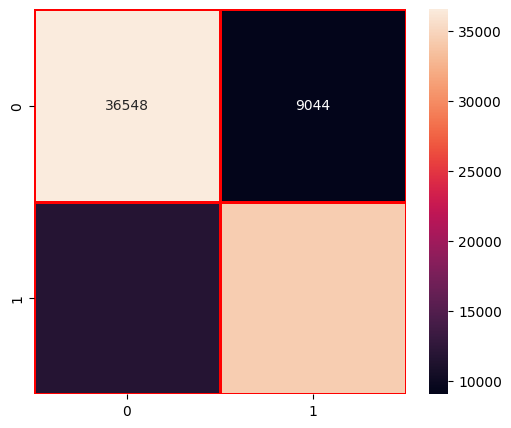

In [29]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_train = log_reg.predict(X_train)
y_pred = log_reg.predict(X_test)

print("*******************RESULTS*******************")
print("The accuracy score of train is :", accuracy_score(y_train, y_pred_train)*100)
print("The accuracy score test is :", accuracy_score(y_test, y_pred)*100)
cv_score = cross_val_score(log_reg,X_train, y_train,cv=5)
print("The cross validation score is :", cv_score.mean()*100)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification \n", classification_report(y_test, y_pred))
print("***********************************************")

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt = "d",linecolor="r",linewidths=1)
plt.show()

*******************RESULTS*******************
The accuracy score of train is : 99.97237830097475
The accuracy score test is : 97.82371669065377
The cross validation score is : 97.01358571653893
Confusion Matrix: 
 [[45525    67]
 [ 1929 44195]]
Classification
                precision    recall  f1-score   support

           0       0.96      1.00      0.98     45592
           1       1.00      0.96      0.98     46124

    accuracy                           0.98     91716
   macro avg       0.98      0.98      0.98     91716
weighted avg       0.98      0.98      0.98     91716

***********************************************


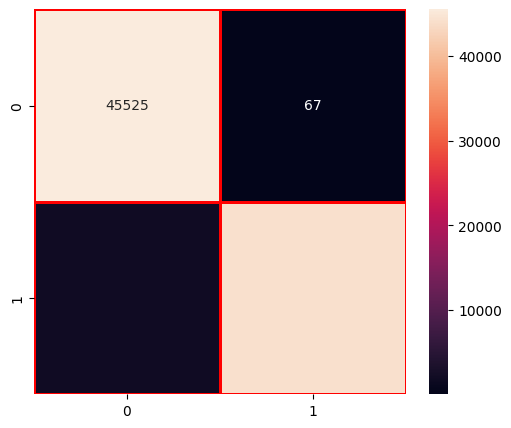

In [30]:
ran_clf = RandomForestClassifier()
ran_clf.fit(X_train, y_train)
y_pred_train = ran_clf.predict(X_train)
y_pred = ran_clf.predict(X_test)

print("*******************RESULTS*******************")
print("The accuracy score of train is :", accuracy_score(y_train, y_pred_train)*100)
print("The accuracy score test is :", accuracy_score(y_test, y_pred)*100)
cv_score = cross_val_score(ran_clf,X_train, y_train,cv=5)
print("The cross validation score is :", cv_score.mean()*100)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification\n ", classification_report(y_test, y_pred))
print("***********************************************")

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt = "d",linecolor="r",linewidths=1)

plt.show()

*******************RESULTS*******************
The accuracy score of train is : 99.97274174438299
The accuracy score test  is : 95.31815604692747
The cross validation score is : 94.21979714612803
Confusion Matrix: 
 [[45521    71]
 [ 4223 41901]]
Classification 
               precision    recall  f1-score   support

           0       0.92      1.00      0.95     45592
           1       1.00      0.91      0.95     46124

    accuracy                           0.95     91716
   macro avg       0.96      0.95      0.95     91716
weighted avg       0.96      0.95      0.95     91716

***********************************************


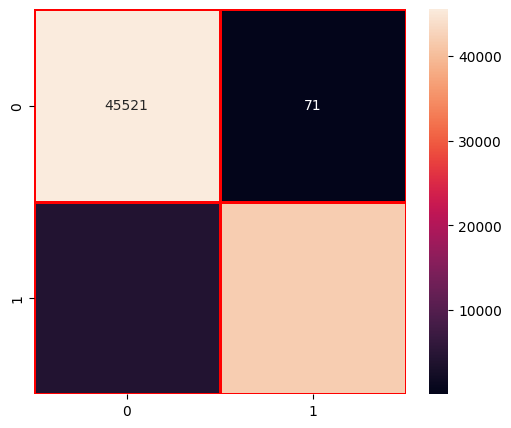

In [31]:
dec_clf = DecisionTreeClassifier()
dec_clf.fit(X_train, y_train)
y_pred_train = dec_clf.predict(X_train)
y_pred = dec_clf.predict(X_test)

print("*******************RESULTS*******************")
print("The accuracy score of train is :", accuracy_score(y_train, y_pred_train)*100)
print("The accuracy score test  is :", accuracy_score(y_test, y_pred)*100)
cv_score = cross_val_score(dec_clf,X_train, y_train,cv=5)
print("The cross validation score is :", cv_score.mean()*100)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification \n", classification_report(y_test, y_pred))
print("***********************************************")

plt.figure(figsize=(6,5)) 
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt = "d",linecolor="r",linewidths=1)
plt.show()

*******************RESULTS*******************
The accuracy score of train is : 86.32980308636142
The accuracy score test is : 85.52706179946792
The cross validation score is : 85.19149849612442
Confusion Matrix: 
 [[39493  6099]
 [ 7175 38949]]
Classification 
                precision    recall  f1-score   support

           0       0.85      0.87      0.86     45592
           1       0.86      0.84      0.85     46124

    accuracy                           0.86     91716
   macro avg       0.86      0.86      0.86     91716
weighted avg       0.86      0.86      0.86     91716

***********************************************


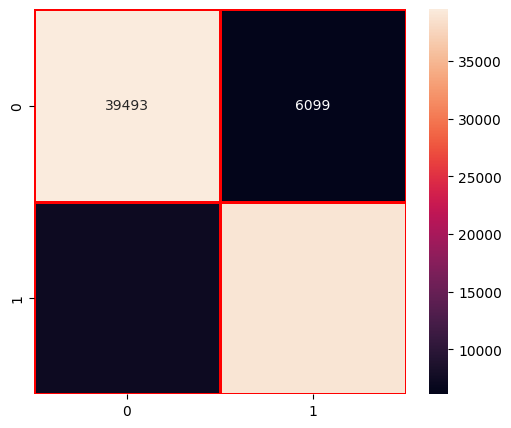

In [32]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_pred_train = xgb_clf.predict(X_train)
y_pred = xgb_clf.predict(X_test)

print("*******************RESULTS*******************")
print("The accuracy score of train is :", accuracy_score(y_train, y_pred_train)*100)
print("The accuracy score test is :", accuracy_score(y_test, y_pred)*100)
cv_score = cross_val_score(xgb_clf,X_train, y_train,cv=5)
print("The cross validation score is :", cv_score.mean()*100)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification \n ", classification_report(y_test, y_pred))
print("***********************************************")

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt = "d",linecolor="r",linewidths=1)
plt.show()

*******************RESULTS*******************
The accuracy score of train is : 90.74018884519491
The accuracy score test is : 86.93357756552838
The cross validation score is : 84.85240587812639
Confusion Matrix: 
 [[44262  1330]
 [10654 35470]]
Classification                precision    recall  f1-score   support

           0       0.81      0.97      0.88     45592
           1       0.96      0.77      0.86     46124

    accuracy                           0.87     91716
   macro avg       0.88      0.87      0.87     91716
weighted avg       0.89      0.87      0.87     91716

***********************************************


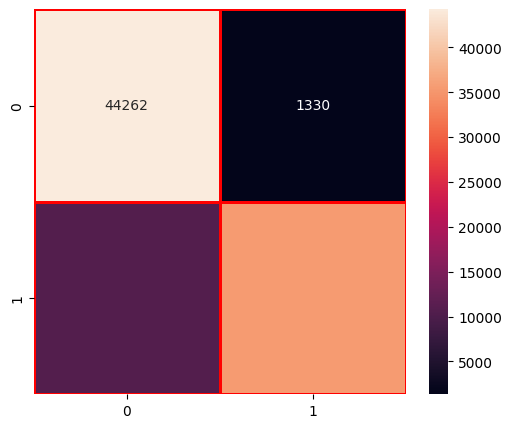

In [33]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_pred_train = knn_clf.predict(X_train)
y_pred = knn_clf.predict(X_test)

print("*******************RESULTS*******************")
print("The accuracy score of train is :", accuracy_score(y_train, y_pred_train)*100)
print("The accuracy score test is :", accuracy_score(y_test, y_pred)*100)
cv_score = cross_val_score(knn_clf,X_train, y_train,cv=5)
print("The cross validation score is :", cv_score.mean()*100)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification ", classification_report(y_test, y_pred))
print("***********************************************")

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt = "d",linecolor="r",linewidths=1)
plt.show()

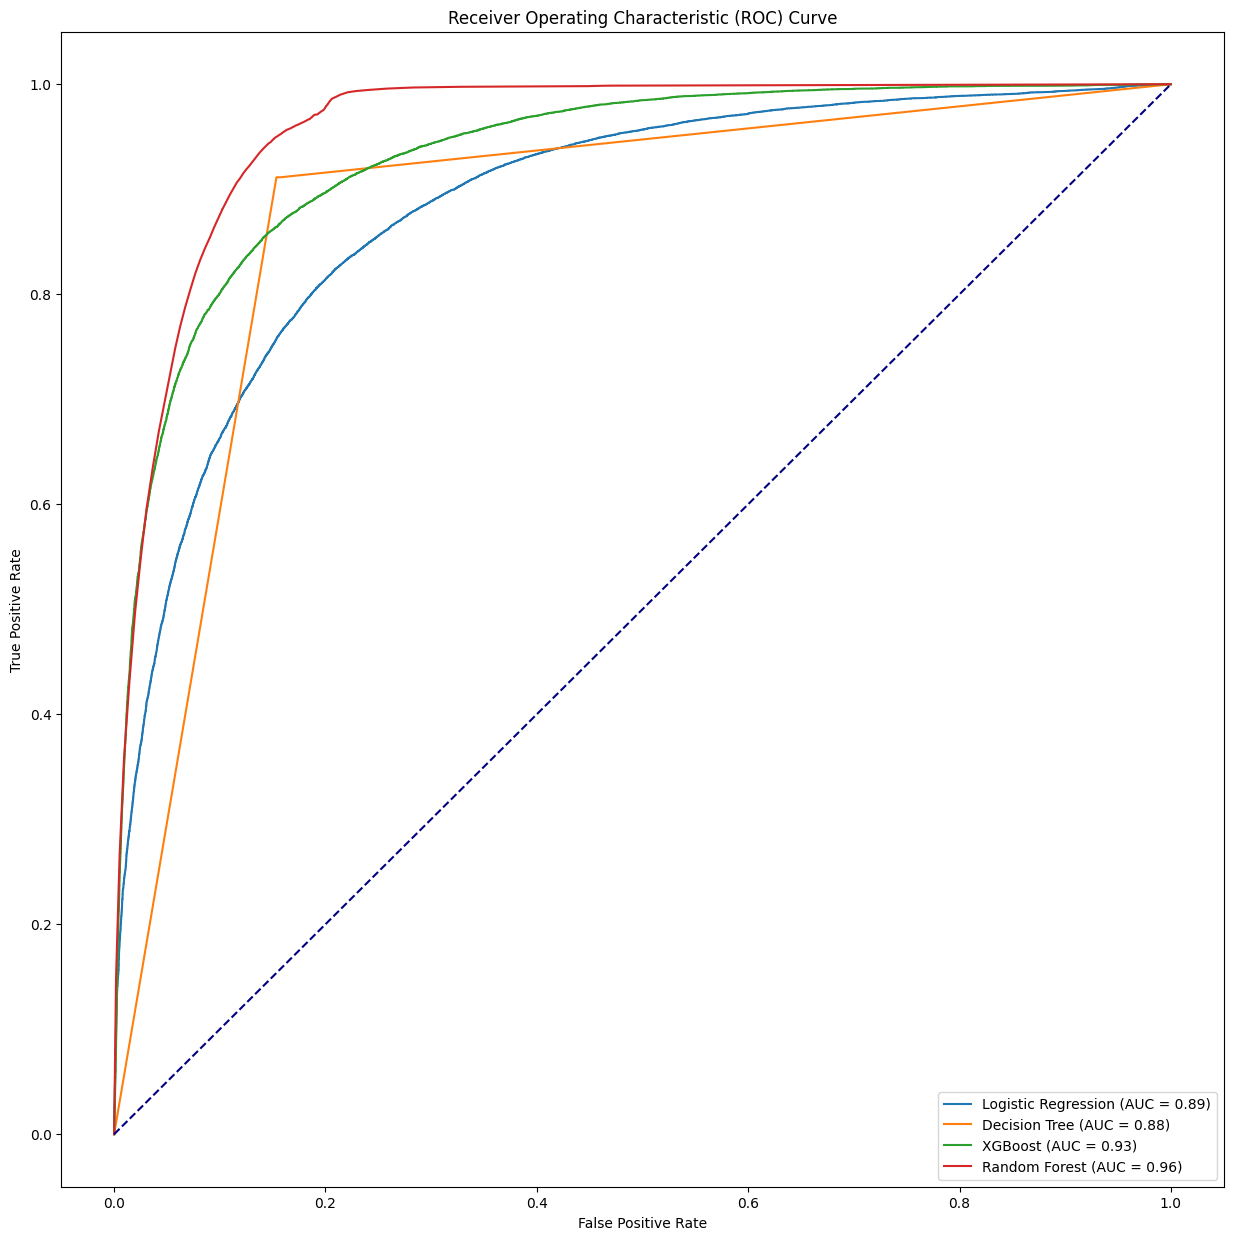

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Calculating  ROC curve and AUC for Logistic Regression
fpr_logreg, tpr_logreg, _ = roc_curve(y_pred, log_reg.predict_proba(X_test)[:, 1])
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Calculating ROC curve and AUC for Decision Tree
fpr_decclf, tpr_decclf, _ = roc_curve(y_pred, dec_clf.predict_proba(X_test)[:, 1])
roc_auc_decclf = auc(fpr_decclf, tpr_decclf)

# Calculating ROC curve and AUC for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_pred, xgb_clf.predict_proba(X_test)[:, 1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Calculating ROC curve and AUC for Random Forest
fpr_ranclf, tpr_ranclf, _ = roc_curve(y_pred, ran_clf.predict_proba(X_test)[:, 1])
roc_auc_ranclf = auc(fpr_ranclf, tpr_ranclf)

# Plotting ROC curves
plt.figure(figsize=(15, 15))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_decclf, tpr_decclf, label=f'Decision Tree (AUC = {roc_auc_decclf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot(fpr_ranclf, tpr_ranclf, label=f'Random Forest (AUC = {roc_auc_ranclf:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [39]:
import joblib
file = "MicroCredit_Defaulter_Project.joblib"
joblib.dump(ran_clf,file)

['MicroCredit_Defaulter_Project.joblib']